# Preparando o ambiente

## Instalações - Estrutura, integridade, valores ausentes e duplicidades

### Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import seaborn as sb
import chardet
from datetime import datetime

from google.colab import drive
drive.mount('/content/drive', True)
OutPath = "/content/drive/MyDrive/Colab Notebooks/5.SINANTB_Nacional_2001-2023/1.4 Resultados e-ou arquivos de saída/"

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



Mounted at /content/drive



### Datasets

In [ ]:
filePathAndName = "/content/drive/MyDrive/Colab Notebooks/5.SINANTB_Nacional_2001-2023/1.1 Base de dados/SINANTB_01a23.csv"

dfSINAN = pd.read_csv(filePathAndName, sep=';', encoding = "UTF-8", index_col=None)
dfSINAN = dfSINAN.loc[:, ~dfSINAN.columns.str.contains('^Unnamed')]

print(dfSINAN.columns.values)


<ipython-input-181-e69b5860767f>:3: DtypeWarning: Columns (8,17,20,21,32,37,38,43,44,46,47,49,58,60,61,66,76,81,87,96) have mixed types. Specify dtype option on import or set low_memory=False.
  dfSINAN = pd.read_csv(filePathAndName, sep=';', encoding = "UTF-8", index_col=None)


['TP_NOT' 'ID_AGRAVO' 'DT_NOTIFIC' 'NU_ANO' 'SG_UF_NOT' 'ID_MUNICIP'
 'ID_REGIONA' 'DT_DIAG' 'ANO_NASC' 'NU_IDADE_N' 'CS_SEXO' 'CS_GESTANT'
 'CS_RACA' 'CS_ESCOL_N' 'SG_UF' 'ID_MN_RESI' 'ID_RG_RESI' 'ID_PAIS'
 'NDUPLIC_N' 'IN_VINCULA' 'DT_DIGITA' 'DT_TRANSUS' 'DT_TRANSDM'
 'DT_TRANSSM' 'DT_TRANSRM' 'DT_TRANSRS' 'DT_TRANSSE' 'CS_FLXRET'
 'FLXRECEBI' 'MIGRADO_W' 'ID_OCUPA_N' 'TRATAMENTO' 'INSTITUCIO'
 'RAIOX_TORA' 'TESTE_TUBE' 'FORMA' 'EXTRAPU1_N' 'EXTRAPU2_N' 'EXTRAPUL_O'
 'AGRAVAIDS' 'AGRAVALCOO' 'AGRAVDIABE' 'AGRAVDOENC' 'AGRAVOUTRA'
 'AGRAVOUTDE' 'BACILOSC_E' 'BACILOS_E2' 'BACILOSC_O' 'CULTURA_ES'
 'CULTURA_OU' 'HIV' 'HISTOPATOL' 'DT_INIC_TR' 'RIFAMPICIN' 'ISONIAZIDA'
 'ETAMBUTOL' 'ESTREPTOMI' 'PIRAZINAMI' 'ETIONAMIDA' 'OUTRAS' 'OUTRAS_DES'
 'TRAT_SUPER' 'NU_CONTATO' 'DOENCA_TRA' 'SG_UF_AT' 'ID_MUNIC_A'
 'DT_NOTI_AT' 'SG_UF_2' 'ID_MUNIC_2' 'BACILOSC_1' 'BACILOSC_2'
 'BACILOSC_3' 'BACILOSC_4' 'BACILOSC_5' 'BACILOSC_6' 'TRATSUP_AT'
 'DT_MUDANCA' 'NU_COMU_EX' 'SITUA_9_M' 'SITUA_12_M' 'SI

In [ ]:
filePathAndName2 = "/content/drive/MyDrive/Colab Notebooks/5.SINANTB_Nacional_2001-2023/1.1 Base de dados/ADH_TB.csv"

df_IDH = pd.read_csv(filePathAndName2, sep=';', encoding = "UTF-8", index_col=None)
df_IDH = df_IDH.loc[:, ~df_IDH.columns.str.contains('^Unnamed')]

print(df_IDH.columns.values)


['ano' 'id_municipio' 'expectativa_vida' 'fecundidade_total'
 'mortalidade_1' 'mortalidade_5' 'razao_dependencia'
 'prob_sobrevivencia_40' 'prob_sobrevivencia_60' 'taxa_envelhecimento'
 'expectativa_anos_estudo' 'taxa_analfabetismo_11_a_14'
 'taxa_analfabetismo_15_a_17' 'taxa_analfabetismo_15_mais'
 'taxa_analfabetismo_18_a_24' 'taxa_analfabetismo_18_mais'
 'taxa_analfabetismo_25_a_29' 'taxa_analfabetismo_25_mais'
 'taxa_atraso_0_basico' 'taxa_atraso_0_fundamental' 'taxa_atraso_0_medio'
 'taxa_atraso_1_basico' 'taxa_atraso_1_fundamental' 'taxa_atraso_1_medio'
 'taxa_atraso_2_basico' 'taxa_atraso_2_fundamental' 'taxa_atraso_2_medio'
 'taxa_freq_bruta_basico' 'taxa_freq_bruta_fundamental'
 'taxa_freq_bruta_medio' 'taxa_freq_bruta_pre' 'taxa_freq_bruta_superior'
 'taxa_freq_liquida_basico' 'taxa_freq_liquida_fundamental'
 'taxa_freq_liquida_medio' 'taxa_freq_liquida_pre'
 'taxa_freq_liquida_superior' 'taxa_freq_0_3' 'taxa_freq_11_14'
 'taxa_freq_15_17' 'taxa_freq_18_24' 'taxa_freq_25_29' 

# Pré-processamento

## Remoção das linhas vazias

Essas linhas não possuíam nenhum dos sintomas preenchidos, então por conta disso, resolvemos desconsiderá-las.

In [ ]:
base = dfSINAN
#Não devemos excluir os Situa_ence = NAN pois segundo josé mário devemos consdierar como desfecho desfavorável
# print(f'Shape ANTES remover linhas com NaN na coluna SITUA_ENCE: {base.shape}')
# base.dropna(subset=['SITUA_ENCE'], how='any', inplace = True)
# print(f'Shape APÓS remover linhas com NaN na coluna SITUA_ENCE: {base.shape}')
# #base.head()
base = base[base["ANO"] >= 2019] #últimos 5 anos, professor Walter solicitação em 03/2025

# Linhas totalmente vazias: 39.364
# Linhas após remoção das linhas vazias: 2.052.347

In [ ]:
print(base.columns.values)

['TP_NOT' 'ID_AGRAVO' 'DT_NOTIFIC' 'NU_ANO' 'SG_UF_NOT' 'ID_MUNICIP'
 'ID_REGIONA' 'DT_DIAG' 'ANO_NASC' 'NU_IDADE_N' 'CS_SEXO' 'CS_GESTANT'
 'CS_RACA' 'CS_ESCOL_N' 'SG_UF' 'ID_MN_RESI' 'ID_RG_RESI' 'ID_PAIS'
 'NDUPLIC_N' 'IN_VINCULA' 'DT_DIGITA' 'DT_TRANSUS' 'DT_TRANSDM'
 'DT_TRANSSM' 'DT_TRANSRM' 'DT_TRANSRS' 'DT_TRANSSE' 'CS_FLXRET'
 'FLXRECEBI' 'MIGRADO_W' 'ID_OCUPA_N' 'TRATAMENTO' 'INSTITUCIO'
 'RAIOX_TORA' 'TESTE_TUBE' 'FORMA' 'EXTRAPU1_N' 'EXTRAPU2_N' 'EXTRAPUL_O'
 'AGRAVAIDS' 'AGRAVALCOO' 'AGRAVDIABE' 'AGRAVDOENC' 'AGRAVOUTRA'
 'AGRAVOUTDE' 'BACILOSC_E' 'BACILOS_E2' 'BACILOSC_O' 'CULTURA_ES'
 'CULTURA_OU' 'HIV' 'HISTOPATOL' 'DT_INIC_TR' 'RIFAMPICIN' 'ISONIAZIDA'
 'ETAMBUTOL' 'ESTREPTOMI' 'PIRAZINAMI' 'ETIONAMIDA' 'OUTRAS' 'OUTRAS_DES'
 'TRAT_SUPER' 'NU_CONTATO' 'DOENCA_TRA' 'SG_UF_AT' 'ID_MUNIC_A'
 'DT_NOTI_AT' 'SG_UF_2' 'ID_MUNIC_2' 'BACILOSC_1' 'BACILOSC_2'
 'BACILOSC_3' 'BACILOSC_4' 'BACILOSC_5' 'BACILOSC_6' 'TRATSUP_AT'
 'DT_MUDANCA' 'NU_COMU_EX' 'SITUA_9_M' 'SITUA_12_M' 'SI

In [ ]:
base.shape

(502533, 108)

In [ ]:
base.sample(10)

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_DIAG,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,NDUPLIC_N,IN_VINCULA,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,CS_FLXRET,FLXRECEBI,MIGRADO_W,ID_OCUPA_N,TRATAMENTO,INSTITUCIO,RAIOX_TORA,TESTE_TUBE,FORMA,EXTRAPU1_N,EXTRAPU2_N,EXTRAPUL_O,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,AGRAVDOENC,AGRAVOUTRA,AGRAVOUTDE,BACILOSC_E,BACILOS_E2,BACILOSC_O,CULTURA_ES,CULTURA_OU,HIV,HISTOPATOL,DT_INIC_TR,RIFAMPICIN,ISONIAZIDA,ETAMBUTOL,ESTREPTOMI,PIRAZINAMI,ETIONAMIDA,OUTRAS,OUTRAS_DES,TRAT_SUPER,NU_CONTATO,DOENCA_TRA,SG_UF_AT,ID_MUNIC_A,DT_NOTI_AT,SG_UF_2,ID_MUNIC_2,BACILOSC_1,BACILOSC_2,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,TRATSUP_AT,DT_MUDANCA,NU_COMU_EX,SITUA_9_M,SITUA_12_M,SITUA_ENCE,DT_ENCERRA,TPUNINOT,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,BENEF_GOV,AGRAVDROGA,AGRAVTABAC,TEST_MOLEC,TEST_SENSI,ANT_RETRO,BAC_APOS_6,TRANSF,UF_TRANSF,MUN_TRANSF,REGIAO,IDADEminutos,IDADEhoras,IDADEdias,IDADEmeses,IDADEanos,IDADE,FAIXA_ETARIA,CAPITAL,CRITERIO_LABORATORIAL,ANO
1743937,Individual,A169,2020-07-13,2020,Rio de Janeiro,330380.0,NaN,2020-07-09,1990.0,4030.0,Feminino,Não,Branca,Ignorado,Rio de Janeiro,330380,NaN,BRASIL,NaN,NaN,2020-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caso Novo,NaN,Suspeito,NaN,Extrapulmonar,Pleural,NaN,NaN,Não,Sim,Não,Não,Não,NaN,Não realizada,NaN,NaN,Não realizado,NaN,Negativo,Não realizado,2020-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,33.0,330380.0,2020-07-13,33.0,330380.0,4.0,4.0,4.0,4.0,4.0,4.0,Não,NaN,3.0,NaN,NaN,Cura,2021-04-12,5.0,Não,Não,Não,Não,Não,Não,Sim,Não realizado,Não realizado,NaN,4.0,NaN,NaN,NaN,Sudeste,NaN,NaN,NaN,NaN,30.0,30.0,30 a 34 anos,NaN,Sem critério laboratorial,2020
1598412,Individual,A169,2019-04-11,2019,Amazonas,130260.0,558.0,2019-04-08,1972.0,4046.0,Feminino,Não,Parda,5a à 8a série incompleta do EF (antigo ginásio...,Amazonas,130260,558.0,BRASIL,1.0,1.0,2019-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caso Novo,NaN,Suspeito,NaN,Pulmonar,.,NaN,NaN,Sim,Não,Não,Não,Não,NaN,Positiva,NaN,NaN,Positiva,NaN,Positivo,Não realizado,2019-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,13.0,130260.0,2019-07-18,13.0,130260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TB-DR,2019-07-18,0.0,Não,Não,Não,Não,Não,Não,Não,Detectável resistente à Rifampicina,NaN,Sim,NaN,NaN,NaN,NaN,Norte,NaN,NaN,NaN,NaN,46.0,46.0,45 a 49 anos,Manaus,Com critério laboratorial,2019
1948938,Individual,A169,2022-08-18,2022,Bahia,290600.0,140.0,2022-08-18,1940.0,4082.0,Masculino,Não se aplica,Parda,1a a 4a série incompleta do EF,Bahia,293020,139.0,BRASIL,NaN,NaN,2022-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caso Novo,NaN,Suspeito,NaN,Pulmonar,.,NaN,NaN,Não,Não,Não,Não,Sim,HAS,Não realizada,NaN,NaN,Não realizado,NaN,Negativo,Não realizado,2022-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,29.0,290600.0,2022-08-18,29.0,293020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transferência,2022-09-13,0.0,Não,Não,Não,Não,NaN,Não,Não,Não realizado,NaN,NaN,NaN,2.0,29.0,29.0,Nordeste,NaN,NaN,NaN,NaN,82.0,82.0,80 anos e mais,NaN,Sem critério laboratorial,2022
2001549,Individual,A169,2023-04-25,2023,Paraíba,250400.0,142.0,2023-04-20,1993.0,4030.0,Masculino,Não se aplica,Branca,Ensino fundamental completo (antigo ginásio ou...,Paraíba,250400,142.0,BRASIL,NaN,NaN,2023-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reingresso após abandono,NaN,Suspeito,NaN,Pulmonar,.,NaN,NaN,Não,Não,Não,Não,Não,NaN,Positiva,NaN,NaN,Em andamento,NaN,Negativo,Não realizado,2023-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,25.0,250400.0,2023-04-25,25.0,250400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transferência,2023-04-25,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nordeste,NaN,NaN,NaN,NaN,30.0,30.0,30 a 34 anos,NaN,Com critério laboratorial,2023
1812046,Individual,A169,2021-03-09,2021,São Paulo,355030.0,NaN,2021-03-09,1962.0,4058.0,Masculino,NaN,Parda,Ensino médio incomple

In [ ]:
import pandas as pd

dataset = base

valor_ignorado = "Ignorado"

missing_counts = dataset.isna().sum() + (dataset == valor_ignorado).sum()

missing_data_report = pd.DataFrame({
    'Coluna': dataset.columns,
    'Registros Vazios (NaN + Ignorado)': missing_counts,
    'Percentual de Vazios (%)': (missing_counts / len(dataset)) * 100
})

missing_data_report = missing_data_report.sort_values(by='Percentual de Vazios (%)', ascending=False).reset_index(drop=True)

print(missing_data_report)

                    Coluna  Registros Vazios (NaN + Ignorado)  \
0               DT_TRANSSE                             502533   
1               DT_TRANSRS                             502533   
2               ID_OCUPA_N                             502533   
3                MIGRADO_W                             502533   
4                FLXRECEBI                             502533   
5               DT_TRANSUS                             502533   
6               DT_TRANSSM                             502533   
7               DT_TRANSDM                             502533   
8                CS_FLXRET                             502533   
9               DT_TRANSRM                             502533   
10              DT_MUDANCA                             502533   
11            IDADEminutos                             502533   
12              SITUA_12_M                             502530   
13              OUTRAS_DES                             502529   
14              INSTITUCI

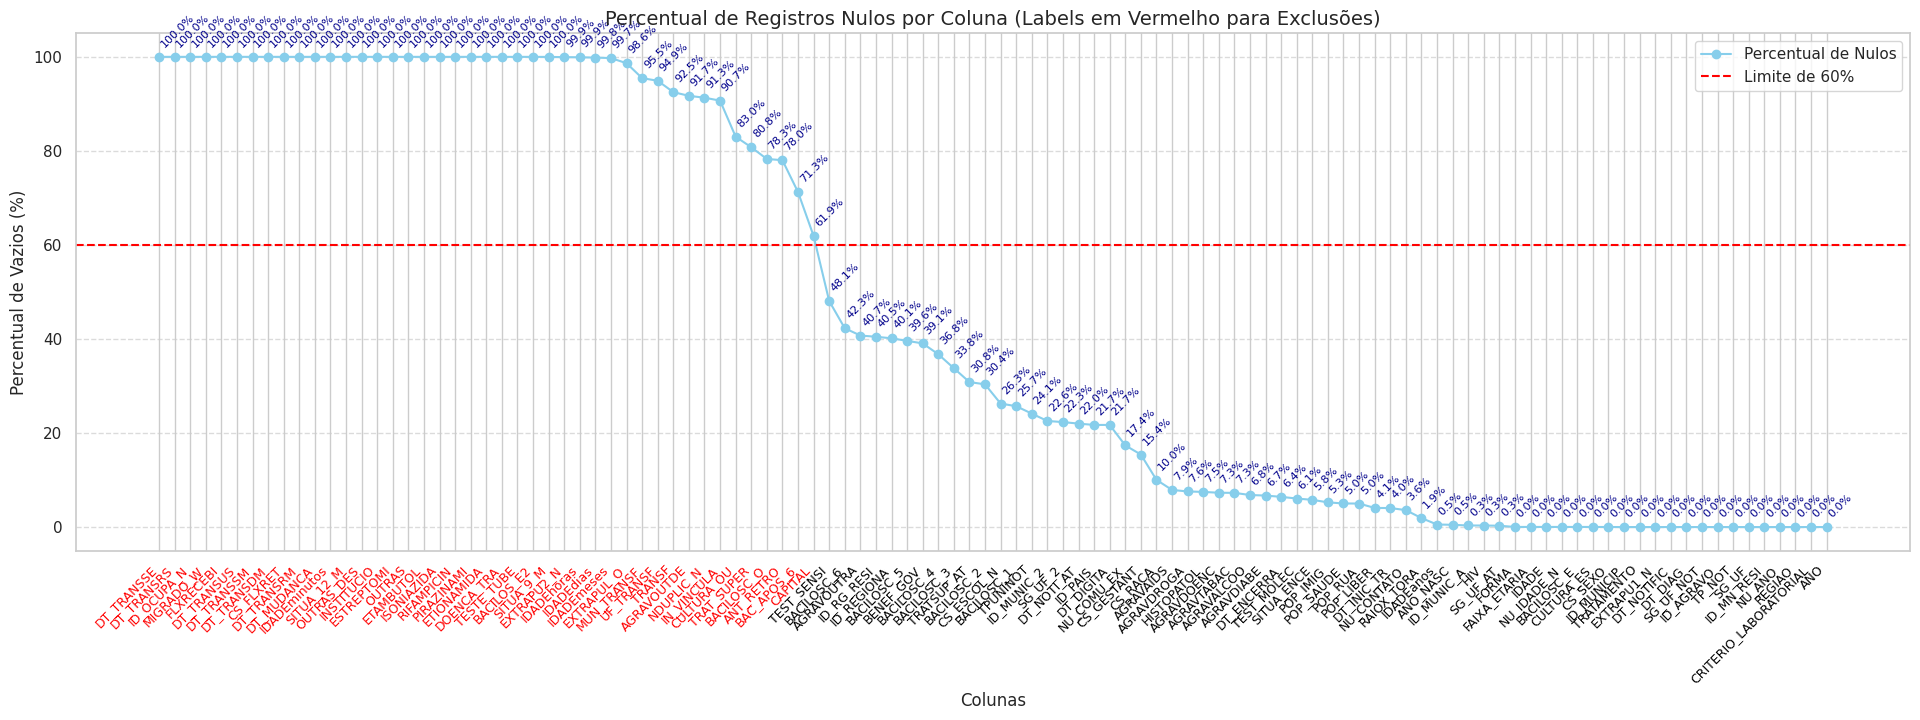

In [ ]:
import matplotlib.pyplot as plt  # Corrigido aqui
limite=60
plt.figure(figsize=(20, 8))

# Plotar o gráfico principal
plt.plot(missing_data_report['Coluna'], missing_data_report['Percentual de Vazios (%)'],
         marker='o', color='skyblue', label='Percentual de Nulos')

plt.axhline(limite, color='red', linestyle='--', label=f'Limite de {limite}%')

# Personalizar as labels do eixo X
x_labels = missing_data_report['Coluna']
x_colors = ['red' if valor > limite else 'black' for valor in missing_data_report['Percentual de Vazios (%)']]

# Adicionar as labels com cores personalizadas
plt.xticks(
    ticks=range(len(x_labels)),  # Posição das labels
    labels=x_labels,            # Textos das labels
    rotation=45,                # Rotação das labels
    ha='right',                 # Alinhamento das labels
    fontsize=9
)

# Pinta individualmente as labels que excedem o limite
ax = plt.gca()
for tick_label, color in zip(ax.get_xticklabels(), x_colors):
    tick_label.set_color(color)

# Adicionar o percentual em cada ponto com rotação e fonte menor
for i, valor in enumerate(missing_data_report['Percentual de Vazios (%)']):
    plt.text(i, valor + 2, f"{valor:.1f}%", rotation=45, ha='left', fontsize=8, color='darkblue')

# Configurações do gráfico
plt.xlabel("Colunas", fontsize=12)
plt.ylabel("Percentual de Vazios (%)", fontsize=12)
plt.title("Percentual de Registros Nulos por Coluna (Labels em Vermelho para Exclusões)", fontsize=14)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=3)

# Exibir o gráfico
plt.show()


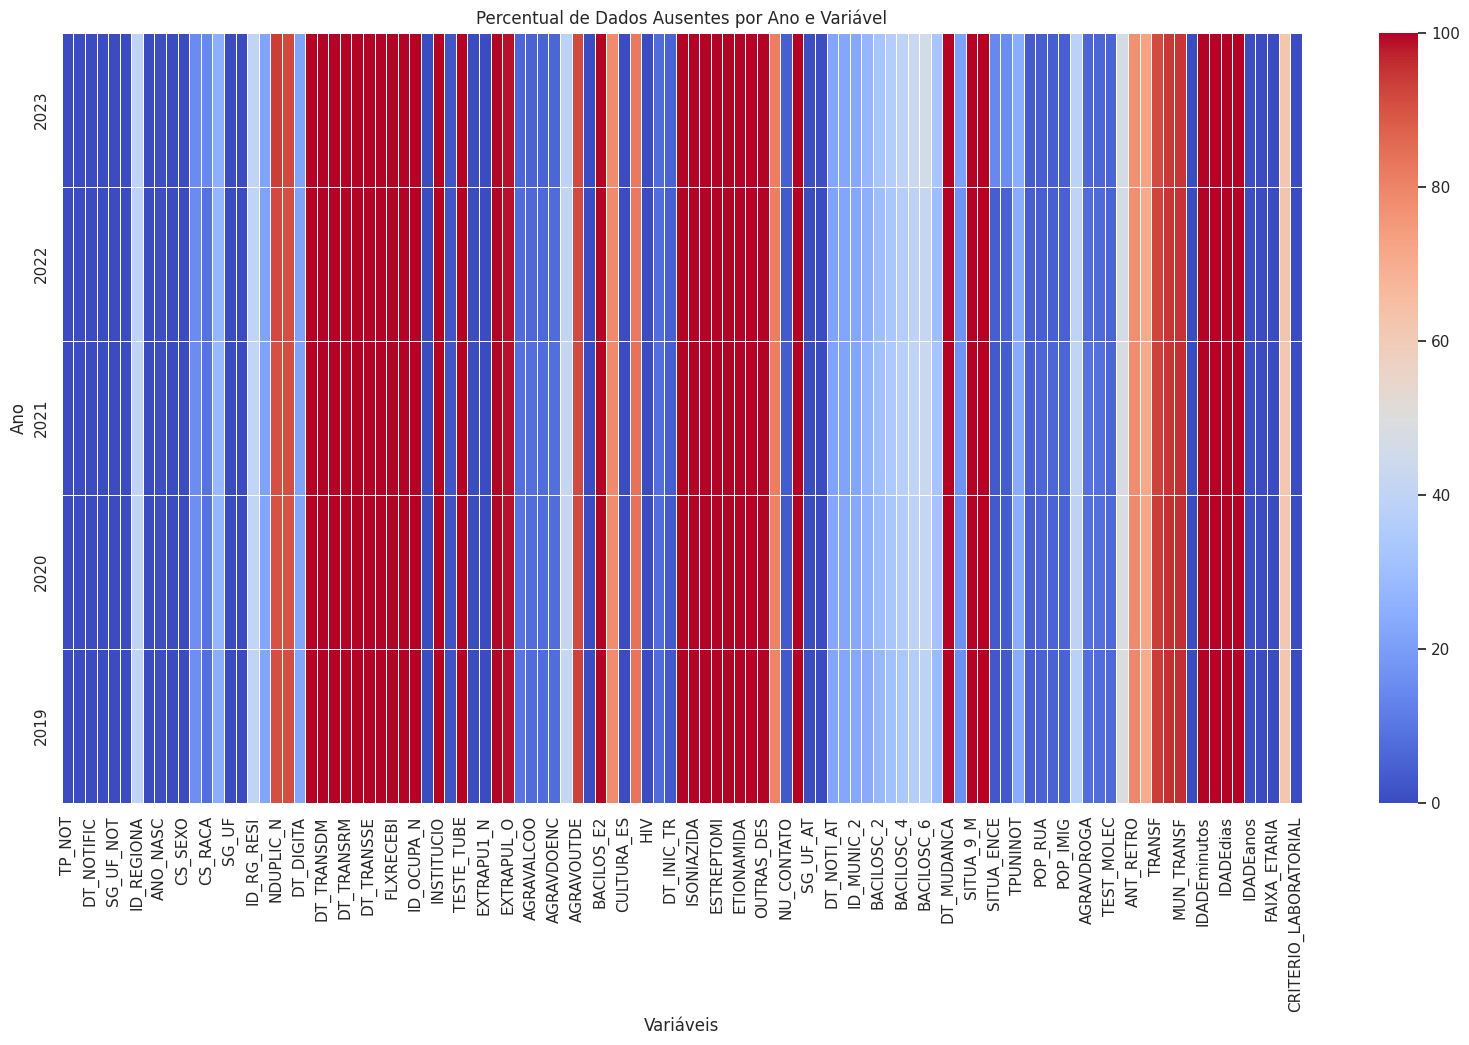

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'base' seja o DataFrame original
dataset = base

# Define o valor que representa "Ignorado"
valor_ignorado = "Ignorado"

# Certifique-se de que há uma coluna "ANO" para agrupar os dados
if 'ANO' not in dataset.columns:
    raise ValueError("A base de dados precisa ter uma coluna chamada 'ANO' para a análise temporal.")

dataset = dataset.dropna(subset=['ANO'])  # Remove linhas com ANO vazio
dataset['ANO'] = dataset['ANO'].astype(int)

# Função para calcular a completude dos dados por ano
def calcular_completude_por_ano(df, colunas):
    anos = sorted(df['ANO'].dropna().unique(), reverse=True)  # Ordena os anos corretamente

    resultados = []
    for ano in anos:
        df_ano = df[df['ANO'] == ano]
        missing_counts = df_ano.isna().sum() + (df_ano == valor_ignorado).sum()
        percent_missing = (missing_counts / len(df_ano)) * 100

        percent_missing_dict = percent_missing.to_dict()  # Converte para dicionário
        percent_missing_dict.pop("ANO", None)  # Remove "ANO" se existir no dicionário

        resultados.append({"ANO": ano, **percent_missing_dict})  # Adiciona o ano corretamente

    return pd.DataFrame(resultados)

# Calcula a completude por ano (passando apenas as colunas que não são 'ANO')
completude_por_ano = calcular_completude_por_ano(dataset, dataset.columns.drop('ANO'))

# Plotando o gráfico
#plt.figure(figsize=(12, 6))
#for coluna in completude_por_ano.columns[1:]:  # Ignorar a coluna "ANO"
    #print(completude_por_ano['ANO'])
#    plt.plot(completude_por_ano['ANO'], completude_por_ano[coluna], label=coluna)

#plt.xlabel("ANO")
#plt.ylabel("Percentual de Dados Vazios (%)")
#plt.title("Evolução da Completude dos Dados por Ano")
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.grid(True)
#plt.show()

# Exibir os primeiros registros para inspeção
#print(completude_por_ano.head())

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(20, 10))  # Aumenta a largura

# Criar o heatmap
sns.heatmap(completude_por_ano.set_index("ANO"),
            cmap="coolwarm", annot=False, fmt=".1f", linewidths=0.5,
            annot_kws={"size": 7})  # Reduz tamanho do texto interno

# Ajustar rótulos
plt.xlabel("Variáveis")
plt.ylabel("Ano")
plt.title("Percentual de Dados Ausentes por Ano e Variável")
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X

# Exibir o gráfico
plt.show()



## Remoção das colunas vazias (+60% dados nulos)

---



In [ ]:
# Filtrar as colunas que têm mais de 60% de valores vazios ou "Ignorado"
colunas_vermelhas = missing_data_report.loc[
    missing_data_report['Percentual de Vazios (%)'] > 60, 'Coluna'
].tolist()

print(colunas_vermelhas)  # Exibir a lista


['DT_TRANSSE', 'DT_TRANSRS', 'ID_OCUPA_N', 'MIGRADO_W', 'FLXRECEBI', 'DT_TRANSUS', 'DT_TRANSSM', 'DT_TRANSDM', 'CS_FLXRET', 'DT_TRANSRM', 'DT_MUDANCA', 'IDADEminutos', 'SITUA_12_M', 'OUTRAS_DES', 'INSTITUCIO', 'ESTREPTOMI', 'OUTRAS', 'ETAMBUTOL', 'ISONIAZIDA', 'RIFAMPICIN', 'PIRAZINAMI', 'ETIONAMIDA', 'DOENCA_TRA', 'TESTE_TUBE', 'BACILOS_E2', 'SITUA_9_M', 'EXTRAPU2_N', 'IDADEhoras', 'IDADEdias', 'IDADEmeses', 'EXTRAPUL_O', 'MUN_TRANSF', 'UF_TRANSF', 'TRANSF', 'AGRAVOUTDE', 'NDUPLIC_N', 'IN_VINCULA', 'CULTURA_OU', 'TRAT_SUPER', 'BACILOSC_O', 'ANT_RETRO', 'BAC_APOS_6', 'CAPITAL']


In [ ]:
print(f'Shape ANTES remover as colunas vazias: {base.shape}')
colunas_vazias = colunas_vermelhas


base.drop(columns=colunas_vazias, inplace = True)
print(f'Shape APÓS remover as colunas vazias: {base.shape}')
#base.head()


Shape ANTES remover as colunas vazias: (502533, 108)
Shape APÓS remover as colunas vazias: (502533, 65)


<ipython-input-191-8c99ad4042aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base.drop(columns=colunas_vazias, inplace = True)


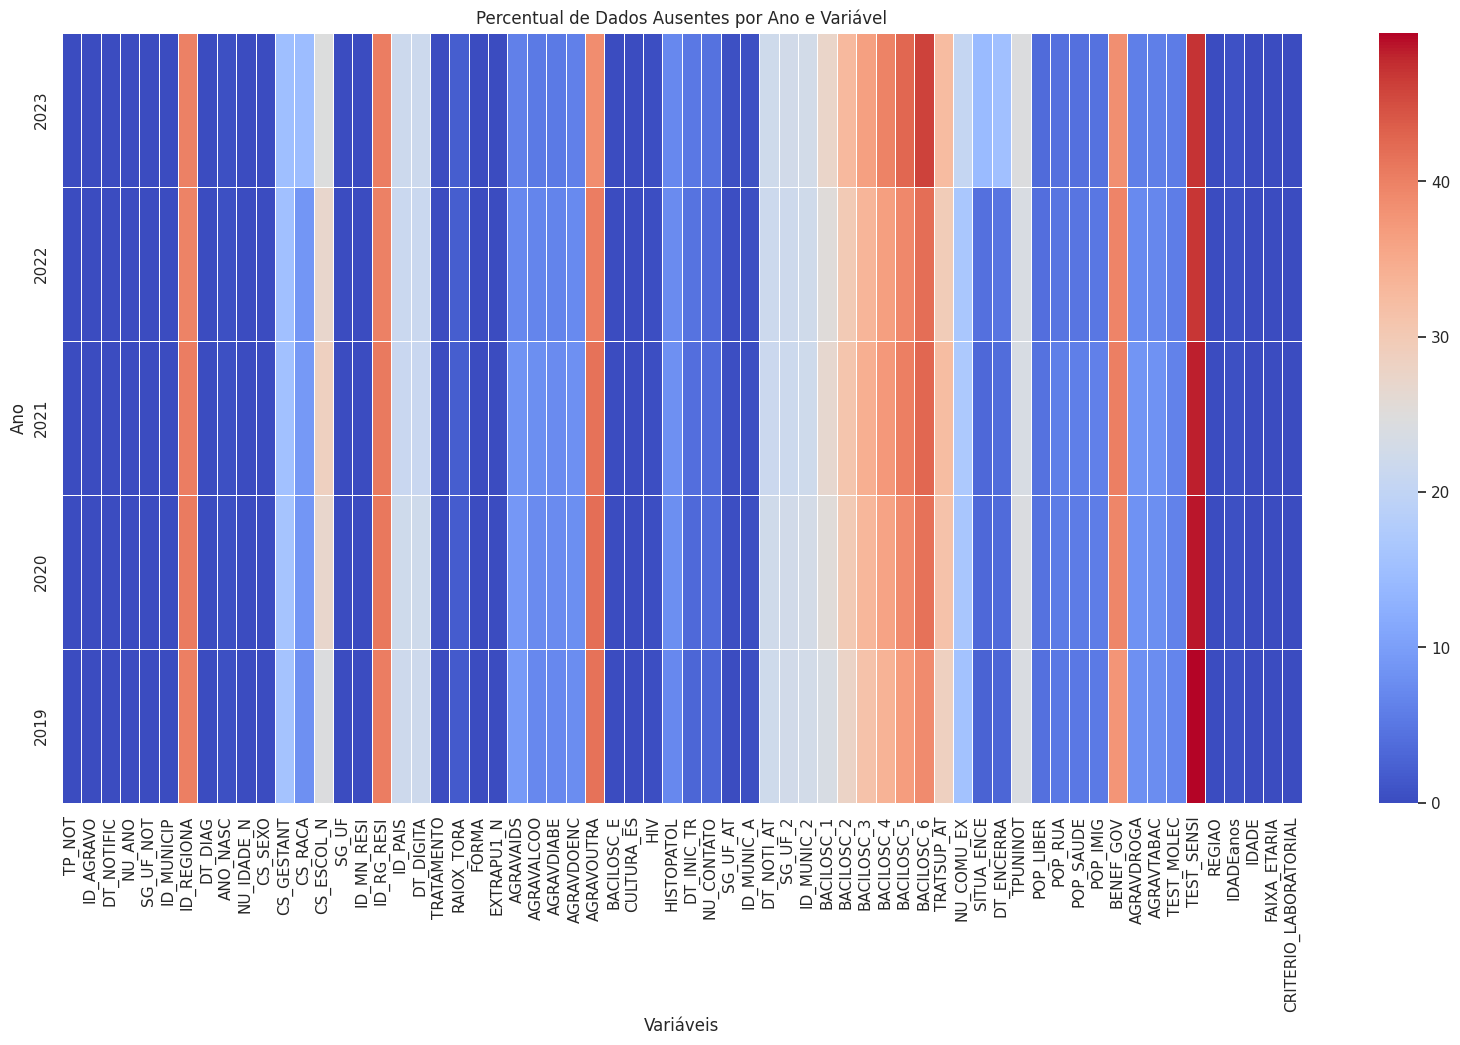

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'base' seja o DataFrame original
dataset = base

# Define o valor que representa "Ignorado"
valor_ignorado = "Ignorado"

# Certifique-se de que há uma coluna "ANO" para agrupar os dados
if 'ANO' not in dataset.columns:
    raise ValueError("A base de dados precisa ter uma coluna chamada 'ANO' para a análise temporal.")

dataset = dataset.dropna(subset=['ANO'])  # Remove linhas com ANO vazio
dataset['ANO'] = dataset['ANO'].astype(int)

# Função para calcular a completude dos dados por ano
def calcular_completude_por_ano(df, colunas):
    anos = sorted(df['ANO'].dropna().unique(), reverse=True)  # Ordena os anos corretamente

    resultados = []
    for ano in anos:
        df_ano = df[df['ANO'] == ano]
        missing_counts = df_ano.isna().sum() + (df_ano == valor_ignorado).sum()
        percent_missing = (missing_counts / len(df_ano)) * 100

        percent_missing_dict = percent_missing.to_dict()  # Converte para dicionário
        percent_missing_dict.pop("ANO", None)  # Remove "ANO" se existir no dicionário

        resultados.append({"ANO": ano, **percent_missing_dict})  # Adiciona o ano corretamente

    return pd.DataFrame(resultados)

# Calcula a completude por ano (passando apenas as colunas que não são 'ANO')
completude_por_ano = calcular_completude_por_ano(dataset, dataset.columns.drop('ANO'))

# Plotando o gráfico
#plt.figure(figsize=(12, 6))
#for coluna in completude_por_ano.columns[1:]:  # Ignorar a coluna "ANO"
    #print(completude_por_ano['ANO'])
#    plt.plot(completude_por_ano['ANO'], completude_por_ano[coluna], label=coluna)

#plt.xlabel("ANO")
#plt.ylabel("Percentual de Dados Vazios (%)")
#plt.title("Evolução da Completude dos Dados por Ano")
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.grid(True)
#plt.show()

# Exibir os primeiros registros para inspeção
#print(completude_por_ano.head())

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(20, 10))  # Aumenta a largura

# Criar o heatmap
sns.heatmap(completude_por_ano.set_index("ANO"),
            cmap="coolwarm", annot=False, fmt=".1f", linewidths=0.5,
            annot_kws={"size": 7})  # Reduz tamanho do texto interno

# Ajustar rótulos
plt.xlabel("Variáveis")
plt.ylabel("Ano")
plt.title("Percentual de Dados Ausentes por Ano e Variável")
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X

# Exibir o gráfico
plt.show()



In [ ]:
print(f'Shape ANTES remover as colunas com dados vazios após o corte do ano do dataset: {base.shape}')
colunas_vazias = [
    'TEST_SENSI',
    ]


base.drop(columns=colunas_vazias, inplace = True)
print(f'Shape ANTES remover as colunas com dados vazios após o corte do ano do dataset: {base.shape}')
#base.head()


Shape ANTES remover as colunas com dados vazios após o corte do ano do dataset: (502533, 65)
Shape ANTES remover as colunas com dados vazios após o corte do ano do dataset: (502533, 64)


<ipython-input-193-a962669d4673>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base.drop(columns=colunas_vazias, inplace = True)


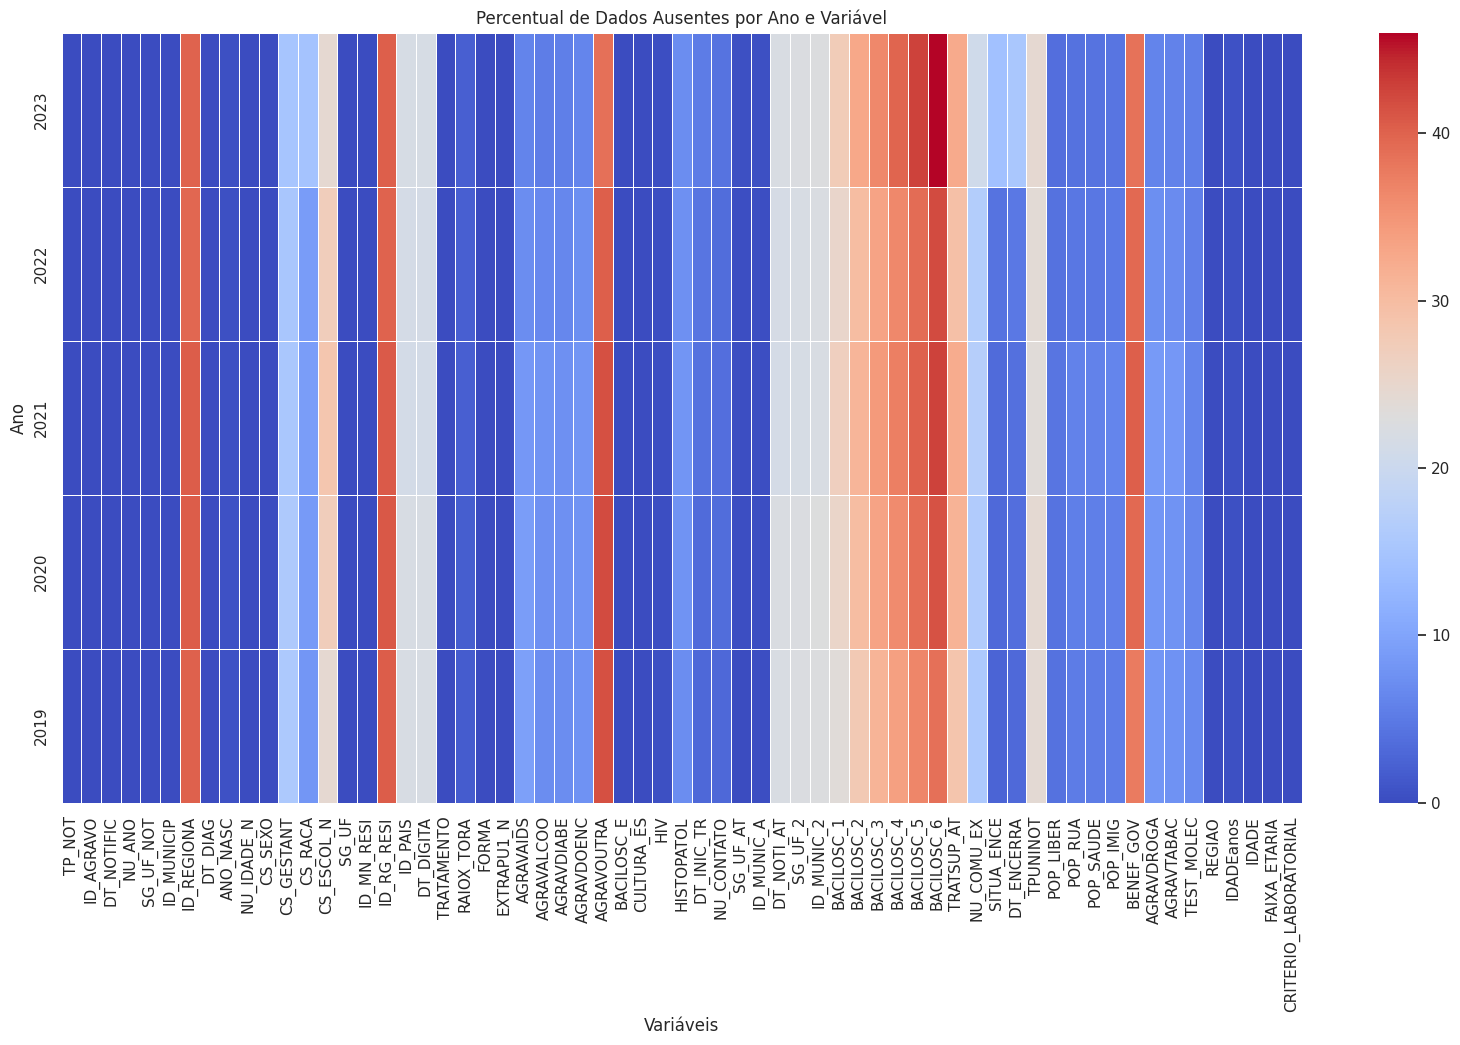

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'base' seja o DataFrame original
dataset = base

# Define o valor que representa "Ignorado"
valor_ignorado = "Ignorado"

# Certifique-se de que há uma coluna "ANO" para agrupar os dados
if 'ANO' not in dataset.columns:
    raise ValueError("A base de dados precisa ter uma coluna chamada 'ANO' para a análise temporal.")

dataset = dataset.dropna(subset=['ANO'])  # Remove linhas com ANO vazio
dataset['ANO'] = dataset['ANO'].astype(int)

# Função para calcular a completude dos dados por ano
def calcular_completude_por_ano(df, colunas):
    anos = sorted(df['ANO'].dropna().unique(), reverse=True)  # Ordena os anos corretamente

    resultados = []
    for ano in anos:
        df_ano = df[df['ANO'] == ano]
        missing_counts = df_ano.isna().sum() + (df_ano == valor_ignorado).sum()
        percent_missing = (missing_counts / len(df_ano)) * 100

        percent_missing_dict = percent_missing.to_dict()  # Converte para dicionário
        percent_missing_dict.pop("ANO", None)  # Remove "ANO" se existir no dicionário

        resultados.append({"ANO": ano, **percent_missing_dict})  # Adiciona o ano corretamente

    return pd.DataFrame(resultados)

# Calcula a completude por ano (passando apenas as colunas que não são 'ANO')
completude_por_ano = calcular_completude_por_ano(dataset, dataset.columns.drop('ANO'))

# Plotando o gráfico
#plt.figure(figsize=(12, 6))
#for coluna in completude_por_ano.columns[1:]:  # Ignorar a coluna "ANO"
    #print(completude_por_ano['ANO'])
#    plt.plot(completude_por_ano['ANO'], completude_por_ano[coluna], label=coluna)

#plt.xlabel("ANO")
#plt.ylabel("Percentual de Dados Vazios (%)")
#plt.title("Evolução da Completude dos Dados por Ano")
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.grid(True)
#plt.show()

# Exibir os primeiros registros para inspeção
#print(completude_por_ano.head())

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(20, 10))  # Aumenta a largura

# Criar o heatmap
sns.heatmap(completude_por_ano.set_index("ANO"),
            cmap="coolwarm", annot=False, fmt=".1f", linewidths=0.5,
            annot_kws={"size": 7})  # Reduz tamanho do texto interno

# Ajustar rótulos
plt.xlabel("Variáveis")
plt.ylabel("Ano")
plt.title("Percentual de Dados Ausentes por Ano e Variável")
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X

# Exibir o gráfico
plt.show()



In [ ]:
# base2 = base.dropna()  # Remove linhas com qualquer NaN
# #base = base[~base.isin(["Ignorado"]).any(axis=1)]  # Remove linhas que tenham "Ignorado"
# base2.shape

# # Contar a quantidade de registros de cada categoria
# contagem = base2['SITUA_ENCE'].value_counts()

# # Calcular o percentual de cada categoria
# percentual = base2['SITUA_ENCE'].value_counts(normalize=True) * 100

# # Criar um DataFrame com os resultados
# relatorio_situa_ence = pd.DataFrame({'Contagem': contagem, 'Percentual (%)': percentual})

# # Exibir o relatório
# print(relatorio_situa_ence)


# Remoção de colunas não importantes para modelos de Classificação (IA)

In [ ]:
base.columns

Index(['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'DT_DIAG', 'ANO_NASC', 'NU_IDADE_N',
       'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI',
       'ID_RG_RESI', 'ID_PAIS', 'DT_DIGITA', 'TRATAMENTO', 'RAIOX_TORA',
       'FORMA', 'EXTRAPU1_N', 'AGRAVAIDS', 'AGRAVALCOO', 'AGRAVDIABE',
       'AGRAVDOENC', 'AGRAVOUTRA', 'BACILOSC_E', 'CULTURA_ES', 'HIV',
       'HISTOPATOL', 'DT_INIC_TR', 'NU_CONTATO', 'SG_UF_AT', 'ID_MUNIC_A',
       'DT_NOTI_AT', 'SG_UF_2', 'ID_MUNIC_2', 'BACILOSC_1', 'BACILOSC_2',
       'BACILOSC_3', 'BACILOSC_4', 'BACILOSC_5', 'BACILOSC_6', 'TRATSUP_AT',
       'NU_COMU_EX', 'SITUA_ENCE', 'DT_ENCERRA', 'TPUNINOT', 'POP_LIBER',
       'POP_RUA', 'POP_SAUDE', 'POP_IMIG', 'BENEF_GOV', 'AGRAVDROGA',
       'AGRAVTABAC', 'TEST_MOLEC', 'REGIAO', 'IDADEanos', 'IDADE',
       'FAIXA_ETARIA', 'CRITERIO_LABORATORIAL', 'ANO'],
      dtype='object')

In [ ]:
base.sample(2)

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_DIAG,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_DIGITA,TRATAMENTO,RAIOX_TORA,FORMA,EXTRAPU1_N,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,AGRAVDOENC,AGRAVOUTRA,BACILOSC_E,CULTURA_ES,HIV,HISTOPATOL,DT_INIC_TR,NU_CONTATO,SG_UF_AT,ID_MUNIC_A,DT_NOTI_AT,SG_UF_2,ID_MUNIC_2,BACILOSC_1,BACILOSC_2,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,TRATSUP_AT,NU_COMU_EX,SITUA_ENCE,DT_ENCERRA,TPUNINOT,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,BENEF_GOV,AGRAVDROGA,AGRAVTABAC,TEST_MOLEC,REGIAO,IDADEanos,IDADE,FAIXA_ETARIA,CRITERIO_LABORATORIAL,ANO
1779636,Individual,A169,2021-09-08,2021,São Paulo,352900.0,NaN,2021-09-01,1960.0,4060.0,Masculino,NaN,Parda,Ensino médio incompleto (antigo colegial ou 2o...,São Paulo,352900,NaN,NaN,NaN,Reingresso após abandono,Suspeito,Pulmonar,.,Sim,Não,Não,Não,NaN,Positiva,Positiva,Positivo,Não realizado,2021-09-05,0.0,35.0,352900.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,Não,0.0,Abandono,2021-11-04,NaN,Não,Não,3,Não,NaN,Não,Não,Não realizado,Sudeste,60.0,60.0,60 a 64 anos,Com critério laboratorial,2021
1770476,Individual,A169,2020-11-26,2020,São Paulo,350635.0,NaN,2020-11-26,1957.0,4063.0,Feminino,Não,NaN,NaN,São Paulo,350635,NaN,NaN,NaN,Caso Novo,Não realizado,Pulmonar,.,Não,Não,Não,Não,NaN,Não realizada,Negativa,Negativo,Não realizado,2020-11-26,3.0,35.0,350635.0,NaN,NaN,NaN,3.0,3.0,3.0,NaN,NaN,NaN,Ignorado,0.0,NaN,NaN,NaN,Não,Não,3,Não,NaN,Não,Não,NaN,Sudeste,63.0,63.0,60 a 64 anos,Sem critério laboratorial,2020


In [ ]:
base2 = base

In [ ]:
print(f'Shape ANTES remover as colunas não importantes para o contexto do problema e da IA classificativa: {base.shape}')
colunas_vazias = [
    'ID_AGRAVO',
    'DT_NOTIFIC',
    'NU_ANO',
    'ID_PAIS',
    #'DT_DIAG',
    'ANO_NASC',
    'NU_IDADE_N',
    'SG_UF',
    #'ID_MUNICIP',
    'ID_RG_RESI',
    #'NDUPLIC_N',
    #'IN_VINCULA',
    #'NU_CONTATO',
    'SG_UF_AT',
    'ID_MUNIC_A',
    'DT_NOTI_AT',
    'SG_UF_2',
    'ID_MUNIC_2',
    'DT_ENCERRA',
    'TPUNINOT',
    #'TRANSF',
    #'ANO', #deixar o ano apenas para geração de gráficos.
    'TP_NOT',
    #'REGIAO',
    'IDADEanos',
    #'INSTITUCIO',
    #'DT_INIC_TR',
    #'DT_MUDANCA',
    #'NU_COMU_EX',
    'FAIXA_ETARIA',
    'CRITERIO_LABORATORIAL',
    'TP_NOT',
    'ID_AGRAVO',
    #'MIGRADO_W',
    'ID_MN_RESI', #o município poderia ser relevante, entretanto as características ficariam enormes usando one-hot-encoding, deixei somente a região
    'ID_REGIONA',
    'SG_UF_NOT',
    'CS_GESTANT',
    'DT_DIGITA'
    ]


base.drop(columns=colunas_vazias, inplace = True)
print(f'Shape APÓS remover as colunas não importantes para o contexto do problema e da IA classificativa: {base.shape}')
#base.head()


Shape ANTES remover as colunas não importantes para o contexto do problema e da IA classificativa: (502533, 64)
Shape APÓS remover as colunas não importantes para o contexto do problema e da IA classificativa: (502533, 40)


<ipython-input-199-50a69d06542f>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base.drop(columns=colunas_vazias, inplace = True)


# Proporção de contatos examinados

> Adicionar aspas



<ipython-input-200-722527d84ce7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['NU_COMU_EX'] = pd.to_numeric(base['NU_COMU_EX'], errors='coerce')
<ipython-input-200-722527d84ce7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['NU_CONTATO'] = pd.to_numeric(base['NU_CONTATO'], errors='coerce')
<ipython-input-200-722527d84ce7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Estatísticas após remoção dos outliers:
count    295232.000000
mean          0.700125
std           0.434804
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.200000
Name: PROP_CONTATOS_EXAMINADOS, dtype: float64


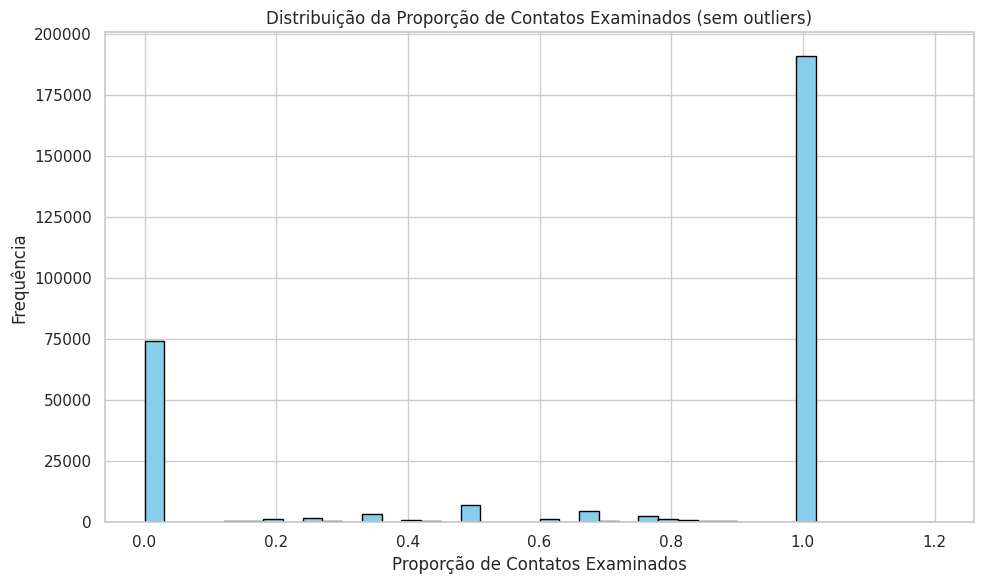

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Garantir que os campos sejam numéricos
base['NU_COMU_EX'] = pd.to_numeric(base['NU_COMU_EX'], errors='coerce')
base['NU_CONTATO'] = pd.to_numeric(base['NU_CONTATO'], errors='coerce')

# Remover registros com número de contatos zero ou ausente
base = base[base['NU_CONTATO'] > 0]

# Calcular a proporção de contatos examinados
base['PROP_CONTATOS_EXAMINADOS'] = base['NU_COMU_EX'] / base['NU_CONTATO']

# Remover valores com proporção negativa ou excessivamente altos (outliers)
limite_superior = 1.2  # Você pode ajustar esse valor conforme seu critério
base_filtrada = base[(base['PROP_CONTATOS_EXAMINADOS'] >= 0) &
                     (base['PROP_CONTATOS_EXAMINADOS'] <= limite_superior)]

# Exibir estatísticas após filtro
print("Estatísticas após remoção dos outliers:")
print(base_filtrada['PROP_CONTATOS_EXAMINADOS'].describe())

# Plotar o histograma da base filtrada
plt.figure(figsize=(10, 6))
plt.hist(base_filtrada['PROP_CONTATOS_EXAMINADOS'], bins='auto', color='skyblue', edgecolor='black')
plt.title('Distribuição da Proporção de Contatos Examinados (sem outliers)')
plt.xlabel('Proporção de Contatos Examinados')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()


# Dias entre o diagnóstico e o início do tratamento (DIAS_ATE_INICIO_TRATAMENTO)

In [ ]:
# Convertendo as colunas para o tipo datetime (caso ainda não estejam)
# Remover as linhas com datas fora do intervalo
base['DT_INIC_TR'] = pd.to_datetime(base['DT_INIC_TR'], errors='coerce', format='%Y-%m-%d')
base['DT_DIAG'] = pd.to_datetime(base['DT_DIAG'], errors='coerce', format='%Y-%m-%d')

base = base[base['DT_INIC_TR'].apply(pd.to_datetime, errors='coerce').notna()]
base = base[base['DT_DIAG'].apply(pd.to_datetime, errors='coerce').notna()]

base['DT_INIC_TR'] = pd.to_datetime(base['DT_INIC_TR'])
base['DT_DIAG'] = pd.to_datetime(base['DT_DIAG'])

print(f'Shape ANTES de remover os registros do SINAN com data de diagnóstico superior ao início do tratamento indicando erro: {base.shape}')
# Calculando os dias em tratamento
base['DIAS_ATE_INICIO_TRATAMENTO'] = (base['DT_INIC_TR'] - base['DT_DIAG']).dt.days

# Removendo as linhas onde 'DIAS_ATE_INICIO_TRATAMENTO' é negativo ou superior a 1800 dias
base = base[(base['DIAS_ATE_INICIO_TRATAMENTO'] >= 0)]

print(f'Shape DEPOIS de remover os registros do SINAN com data de diagnóstico superior ao início do tratamento indicando  erro: {base.shape}')



<ipython-input-201-2c56adff8b12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['DT_INIC_TR'] = pd.to_datetime(base['DT_INIC_TR'], errors='coerce', format='%Y-%m-%d')
<ipython-input-201-2c56adff8b12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['DT_DIAG'] = pd.to_datetime(base['DT_DIAG'], errors='coerce', format='%Y-%m-%d')


Shape ANTES de remover os registros do SINAN com data de diagnóstico superior ao início do tratamento indicando erro: (331122, 41)
Shape DEPOIS de remover os registros do SINAN com data de diagnóstico superior ao início do tratamento indicando  erro: (330291, 42)


In [ ]:

base.sample(2)

,ID_MUNICIP,DT_DIAG,CS_SEXO,CS_RACA,CS_ESCOL_N,TRATAMENTO,RAIOX_TORA,FORMA,EXTRAPU1_N,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,AGRAVDOENC,AGRAVOUTRA,BACILOSC_E,CULTURA_ES,HIV,HISTOPATOL,DT_INIC_TR,NU_CONTATO,BACILOSC_1,BACILOSC_2,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,TRATSUP_AT,NU_COMU_EX,SITUA_ENCE,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,BENEF_GOV,AGRAVDROGA,AGRAVTABAC,TEST_MOLEC,REGIAO,IDADE,ANO,PROP_CONTATOS_EXAMINADOS,DIAS_ATE_INICIO_TRATAMENTO
1623448,500370.0,2019-03-12,Masculino,Indígena,Ignorado,Caso Novo,Suspeito,Pulmonar,.,Não,Sim,Não,Não,Não,Não realizada,Positiva,Negativo,Não realizado,2019-03-13,5.0,2.0,2.0,2.0,2.0,2.0,2.0,Sim,5.0,Cura,Sim,Não,Não,Não,Não,Sim,Não,Detectável sensível à Rifampicina,Centro-Oeste,32.0,2019,1.0,1
1959203,210820.0,2022-10-03,Feminino,Parda,Ensino fundamental completo (antigo ginásio ou...,Caso Novo,Suspeito,Pulmonar,.,Não,Não,Não,Não,Não,Negativa,Não realizado,Negativo,Não realizado,2022-10-10,4.0,3.0,3.0,3.0,3.0,3.0,3.0,Não,4.0,Cura,Não,Não,Não,Não,Não,Não,Não,Não realizado,Nordeste,44.0,2022,1.0,7


# Remoção de colunas laboratoriais, medicações e/ou futuras (exames com 1,2,3,4,56 meses)

In [ ]:
print(f'Shape ANTES remover as colunas laboratoriais, medicações e/ou futuras: {base.shape}')
colunas_vazias = [
    #'RAIOX_TORA',
    #'TESTE_TUBE',
    #'FORMA',
    #'EXTRAPU1_N',
    #'EXTRAPU2_N',
    'BACILOSC_E',
    #'BACILOS_E2',
    #'BACILOSC_O',
    'CULTURA_ES',
    #'CULTURA_OU',
    'AGRAVAIDS',
    #'RIFAMPICIN',
    #'ISONIAZIDA',
    #'ETAMBUTOL',
    #'ESTREPTOMI',
    #'PIRAZINAMI',
    #'ETIONAMIDA',
    #'OUTRAS',
    'BACILOSC_1',
    'BACILOSC_2',
    'BACILOSC_3',
    'BACILOSC_4',
    'BACILOSC_5',
    'BACILOSC_6',
    'TRATSUP_AT',
    #'SITUA_9_M',
    #'TEST_MOLEC',
    #'TEST_SENSI',
    #'ANT_RETRO',
    #'BAC_APOS_6',
    'HISTOPATOL',
    #'HIV', solicitado para permanecer por José Mário em 04/04/2025
    'RAIOX_TORA',
    'FORMA',
    'TEST_MOLEC',
    'EXTRAPU1_N'
    ]

base.drop(columns=colunas_vazias, inplace = True)
print(f'Shape ANTES remover as colunas laboratoriais, medicações e/ou futuras: {base.shape}')
#base.head()


Shape ANTES remover as colunas laboratoriais, medicações e/ou futuras: (330291, 42)
Shape ANTES remover as colunas laboratoriais, medicações e/ou futuras: (330291, 27)


In [ ]:
base.sample(2)

,ID_MUNICIP,DT_DIAG,CS_SEXO,CS_RACA,CS_ESCOL_N,TRATAMENTO,AGRAVALCOO,AGRAVDIABE,AGRAVDOENC,AGRAVOUTRA,HIV,DT_INIC_TR,NU_CONTATO,NU_COMU_EX,SITUA_ENCE,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,BENEF_GOV,AGRAVDROGA,AGRAVTABAC,REGIAO,IDADE,ANO,PROP_CONTATOS_EXAMINADOS,DIAS_ATE_INICIO_TRATAMENTO
1973800,313670.0,2022-12-12,Masculino,Parda,Educação superior completa,Caso Novo,Não,Não,Não,Não,Negativo,2022-12-16,6.0,NaN,Abandono,Não,Não,Sim,Não,Não,Não,Não,Sudeste,35.0,2022,NaN,4
1678967,355030.0,2019-11-14,Masculino,Parda,1a a 4a série incompleta do EF,Caso Novo,Sim,Não,Não,NaN,Negativo,2020-01-02,1.0,1.0,Cura,Não,Não,3,Não,NaN,Não,Sim,Sudeste,34.0,2019,1.0,49


In [ ]:
base.shape

(330291, 27)

# Verificando quantos registros vazios tem em cada coluna, após o pré-processamento

In [ ]:
import pandas as pd

# Supondo que o dataset já esteja carregado
dataset = base

# Criar um DataFrame para armazenar os resultados
columns_info = []

for column in dataset.columns:
    column_type = dataset[column].dtype  # Tipo da coluna
    missing_percentage = dataset[column].isna().mean() * 100  # Percentual de valores nulos

    if column_type == 'object' or column_type.name == 'category':
        # Coluna categórica: listar categorias e seus percentuais
        unique_values = dataset[column].dropna().unique()  # Valores únicos (excluindo NaN)
        categories_count = len(unique_values)  # Quantidade de categorias
        categories_info = dataset[column].value_counts(normalize=True) * 100  # Percentual de cada categoria

        # Adicionar informações ao DataFrame
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Categórico',
            'Categorias': unique_values.tolist(),
            'Qtd Categorias': categories_count,
            'Percentual Nulos': missing_percentage,
            'Info Categorias': categories_info.to_dict()
        })

    elif column_type in ['datetime64[ns]', 'datetime64[ns, UTC]']:
        # Coluna de data
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Data',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

    else:
        # Coluna numérica
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Numérico',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

# Converter para DataFrame para visualização
columns_info_df = pd.DataFrame(columns_info)

# Exibir o DataFrame gerado
columns_info_df


#columns_info_df.to_csv('columns_info.csv', index=False)



,Coluna,Tipo,Percentual Nulos,Info Categorias,Categorias,Qtd Categorias
0,ID_MUNICIP,Numérico,0.000303,None,NaN,NaN
1,DT_DIAG,Data,0.000000,None,NaN,NaN
2,CS_SEXO,Categórico,0.000000,"{'Masculino': 67.30852490682459, 'Feminino': 3...","[Masculino, Feminino, Ignorado]",3.0
3,CS_RACA,Categórico,4.392490,"{'Parda': 53.46139595861715, 'Branca': 26.7899...","[Branca, Preta, Parda, Ignorado, Amarela, Indí...",6.0
4,CS_ESCOL_N,Categórico,7.435867,{'5a à 8a série incompleta do EF (antigo ginás...,"[Ignorado, Ensino médio incompleto (antigo col...",11.0
5,TRATAMENTO,Categórico,0.000000,"{'Caso Novo': 81.38550550877862, 'Reingresso a...","[Caso Novo, Transferência, Reingresso após aba...",6.0
6,AGRAVALCOO,Categórico,1.125674,"{'Não': 78.90088892835598, 'Sim': 17.823886236...","[Sim, Não, Ignorado]",3.0
7,AGRAVDIABE,Categórico,1.172300,"{'Não': 87.25135485373094, 'Sim': 9.4960771278...","[Não, Sim, Ignorado]",3.0
8,AGRAVDOENC,Categórico,1.471733,"{'Não': 94.05125526226838, 'Ignorado': 3.43361...","[Não, Sim, Ignorado]",3.0
9,AGRAVOUTRA,Categórico,31.198549,"{'Não': 78.38368280930274, 'Sim': 11.300138616...","[Não, Sim, Ignorado]",3.0


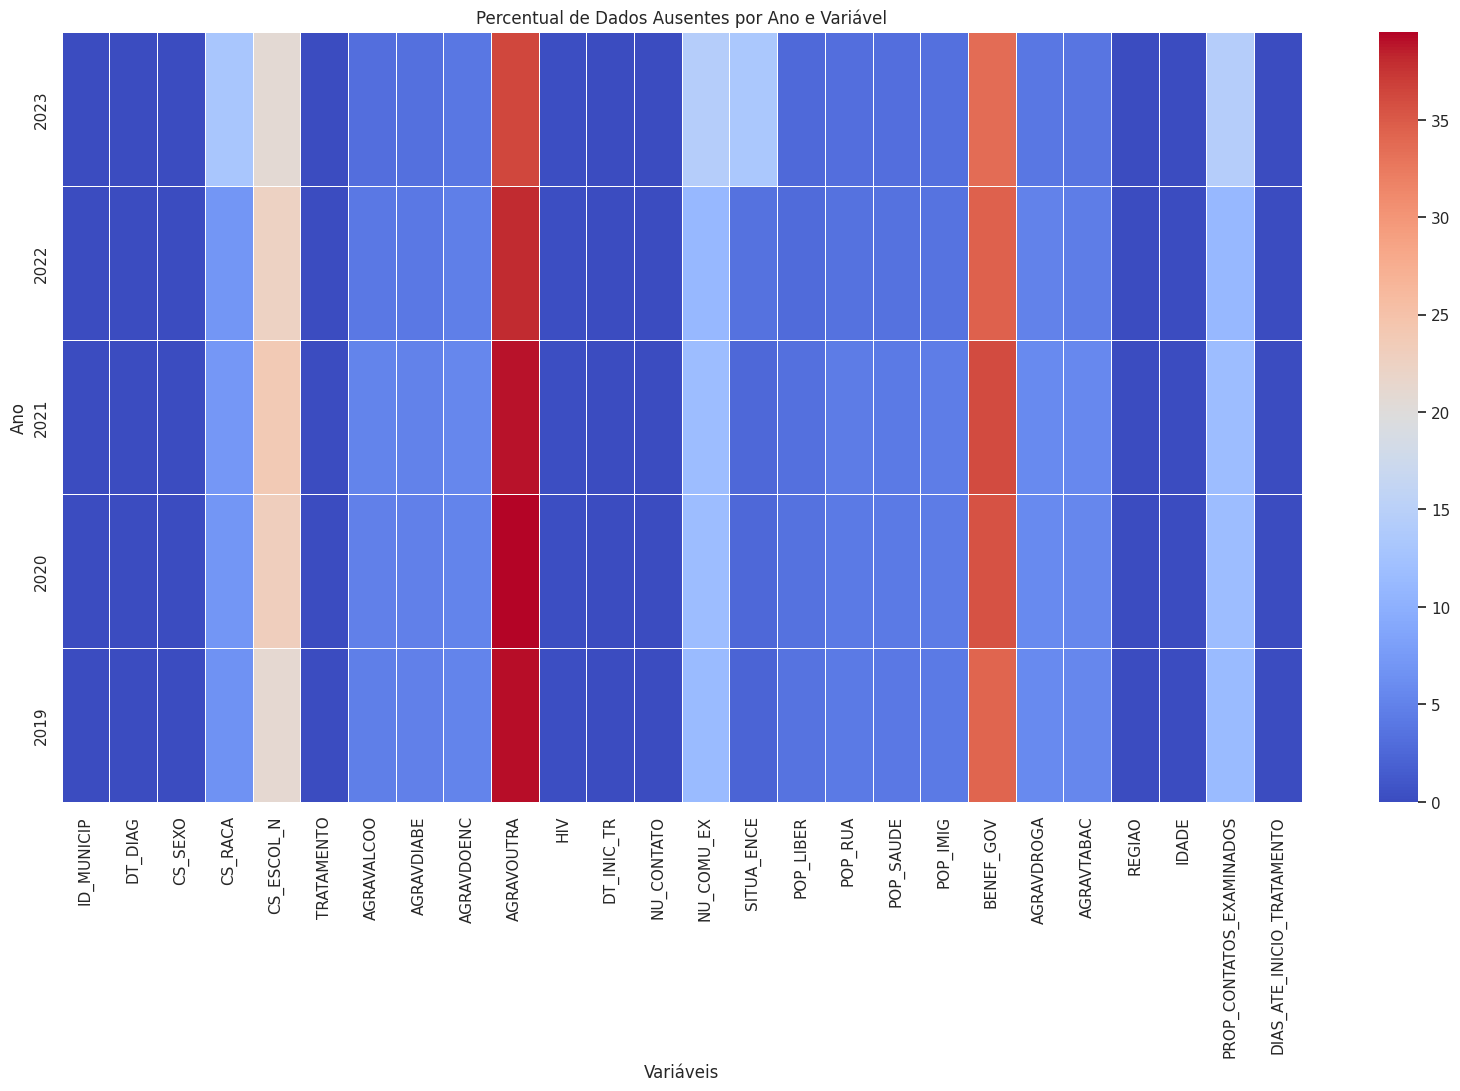

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'base' seja o DataFrame original
dataset = base

# Define o valor que representa "Ignorado"
valor_ignorado = "Ignorado"

# Certifique-se de que há uma coluna "ANO" para agrupar os dados
if 'ANO' not in dataset.columns:
    raise ValueError("A base de dados precisa ter uma coluna chamada 'ANO' para a análise temporal.")

dataset = dataset.dropna(subset=['ANO'])  # Remove linhas com ANO vazio
dataset['ANO'] = dataset['ANO'].astype(int)

# Função para calcular a completude dos dados por ano
def calcular_completude_por_ano(df, colunas):
    anos = sorted(df['ANO'].dropna().unique(), reverse=True)  # Ordena os anos corretamente

    resultados = []
    for ano in anos:
        df_ano = df[df['ANO'] == ano]
        missing_counts = df_ano.isna().sum() + (df_ano == valor_ignorado).sum()
        percent_missing = (missing_counts / len(df_ano)) * 100

        percent_missing_dict = percent_missing.to_dict()  # Converte para dicionário
        percent_missing_dict.pop("ANO", None)  # Remove "ANO" se existir no dicionário

        resultados.append({"ANO": ano, **percent_missing_dict})  # Adiciona o ano corretamente

    return pd.DataFrame(resultados)

# Calcula a completude por ano (passando apenas as colunas que não são 'ANO')
completude_por_ano = calcular_completude_por_ano(dataset, dataset.columns.drop('ANO'))

# Plotando o gráfico
#plt.figure(figsize=(12, 6))
#for coluna in completude_por_ano.columns[1:]:  # Ignorar a coluna "ANO"
    #print(completude_por_ano['ANO'])
#    plt.plot(completude_por_ano['ANO'], completude_por_ano[coluna], label=coluna)

#plt.xlabel("ANO")
#plt.ylabel("Percentual de Dados Vazios (%)")
#plt.title("Evolução da Completude dos Dados por Ano")
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.grid(True)
#plt.show()

# Exibir os primeiros registros para inspeção
#print(completude_por_ano.head())

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(20, 10))  # Aumenta a largura

# Criar o heatmap
sns.heatmap(completude_por_ano.set_index("ANO"),
            cmap="coolwarm", annot=False, fmt=".1f", linewidths=0.5,
            annot_kws={"size": 7})  # Reduz tamanho do texto interno

# Ajustar rótulos
plt.xlabel("Variáveis")
plt.ylabel("Ano")
plt.title("Percentual de Dados Ausentes por Ano e Variável")
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X

# Exibir o gráfico
plt.show()



Remover registros NaN em qualquer coluna.

In [ ]:
base['SITUA_ENCE'] = base['SITUA_ENCE'].fillna('Vazio') #substituir NaN por Vazio, que vai ser utilizado para agrupamento em desfavorável segundo José Mário
base2 = base.dropna()  # Remove linhas com qualquer NaN
base2.shape

# Contar a quantidade de registros de cada categoria
contagem = base2['SITUA_ENCE'].value_counts()

# Calcular o percentual de cada categoria
percentual = base2['SITUA_ENCE'].value_counts(normalize=True) * 100

# Criar um DataFrame com os resultados
relatorio_situa_ence = pd.DataFrame({'Contagem': contagem, 'Percentual (%)': percentual})

# Exibir o relatório
print(relatorio_situa_ence)


                        Contagem  Percentual (%)
SITUA_ENCE                                      
Cura                      123294       69.384011
Abandono                   22792       12.826256
Transferência              10027        5.642720
Vazio                       5204        2.928564
Óbito por outra causa       4557        2.564463
Óbito por TB                3917        2.204302
Mudança de diagnóstico      3595        2.023095
TB-DR                       1883        1.059663
Mudança de esquema          1158        0.651667
Abandono primário           1104        0.621279
Falência                     167        0.093980


In [ ]:
base2.shape

(177698, 27)

In [ ]:
import pandas as pd

# Supondo que o dataset já esteja carregado
dataset = base2

# Criar um DataFrame para armazenar os resultados
columns_info = []

for column in dataset.columns:
    column_type = dataset[column].dtype  # Tipo da coluna
    missing_percentage = dataset[column].isna().mean() * 100  # Percentual de valores nulos

    if column_type == 'object' or column_type.name == 'category':
        # Coluna categórica: listar categorias e seus percentuais
        unique_values = dataset[column].dropna().unique()  # Valores únicos (excluindo NaN)
        categories_count = len(unique_values)  # Quantidade de categorias
        categories_info = dataset[column].value_counts(normalize=True) * 100  # Percentual de cada categoria

        # Adicionar informações ao DataFrame
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Categórico',
            'Categorias': unique_values.tolist(),
            'Qtd Categorias': categories_count,
            'Percentual Nulos': missing_percentage,
            'Info Categorias': categories_info.to_dict()
        })

    elif column_type in ['datetime64[ns]', 'datetime64[ns, UTC]']:
        # Coluna de data
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Data',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

    else:
        # Coluna numérica
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Numérico',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

# Converter para DataFrame para visualização
columns_info_df = pd.DataFrame(columns_info)

# Exibir o DataFrame gerado
columns_info_df


#columns_info_df.to_csv('columns_info.csv', index=False)



,Coluna,Tipo,Percentual Nulos,Info Categorias,Categorias,Qtd Categorias
0,ID_MUNICIP,Numérico,0.0,None,NaN,NaN
1,DT_DIAG,Data,0.0,None,NaN,NaN
2,CS_SEXO,Categórico,0.0,"{'Masculino': 66.60232529347545, 'Feminino': 3...","[Masculino, Feminino, Ignorado]",3.0
3,CS_RACA,Categórico,0.0,"{'Parda': 54.56504856554378, 'Branca': 24.9366...","[Branca, Parda, Preta, Ignorado, Amarela, Indí...",6.0
4,CS_ESCOL_N,Categórico,0.0,"{'Ignorado': 19.064930387511396, '5a à 8a séri...","[Ignorado, Ensino médio incompleto (antigo col...",11.0
5,TRATAMENTO,Categórico,0.0,"{'Caso Novo': 81.52764803205439, 'Reingresso a...","[Caso Novo, Transferência, Reingresso após aba...",6.0
6,AGRAVALCOO,Categórico,0.0,"{'Não': 79.07854899886324, 'Sim': 16.849936408...","[Sim, Não, Ignorado]",3.0
7,AGRAVDIABE,Categórico,0.0,"{'Não': 86.29922677801663, 'Sim': 9.7198617879...","[Não, Sim, Ignorado]",3.0
8,AGRAVDOENC,Categórico,0.0,"{'Não': 93.18112753097952, 'Ignorado': 4.19869...","[Não, Sim, Ignorado]",3.0
9,AGRAVOUTRA,Categórico,0.0,"{'Não': 78.66717689563191, 'Sim': 10.844804105...","[Não, Sim, Ignorado]",3.0


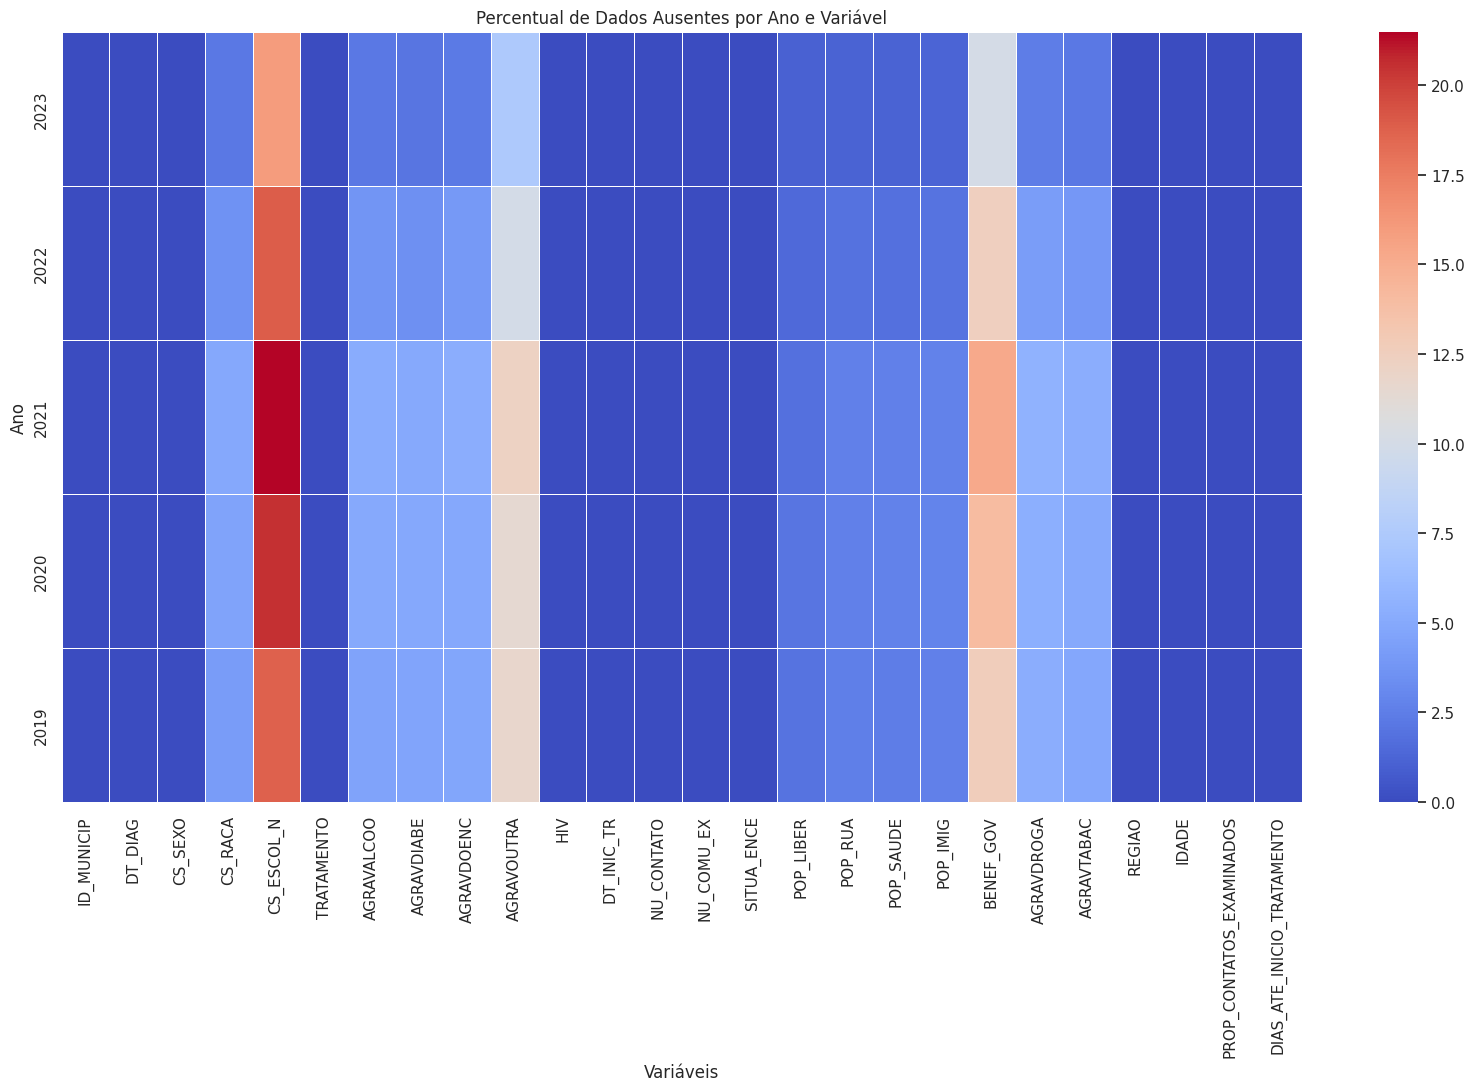

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'base' seja o DataFrame original
dataset = base2

# Define o valor que representa "Ignorado"
valor_ignorado = "Ignorado"

# Certifique-se de que há uma coluna "ANO" para agrupar os dados
if 'ANO' not in dataset.columns:
    raise ValueError("A base de dados precisa ter uma coluna chamada 'ANO' para a análise temporal.")

dataset = dataset.dropna(subset=['ANO'])  # Remove linhas com ANO vazio
dataset['ANO'] = dataset['ANO'].astype(int)

# Função para calcular a completude dos dados por ano
def calcular_completude_por_ano(df, colunas):
    anos = sorted(df['ANO'].dropna().unique(), reverse=True)  # Ordena os anos corretamente

    resultados = []
    for ano in anos:
        df_ano = df[df['ANO'] == ano]
        missing_counts = df_ano.isna().sum() + (df_ano == valor_ignorado).sum()
        percent_missing = (missing_counts / len(df_ano)) * 100

        percent_missing_dict = percent_missing.to_dict()  # Converte para dicionário
        percent_missing_dict.pop("ANO", None)  # Remove "ANO" se existir no dicionário

        resultados.append({"ANO": ano, **percent_missing_dict})  # Adiciona o ano corretamente

    return pd.DataFrame(resultados)

# Calcula a completude por ano (passando apenas as colunas que não são 'ANO')
completude_por_ano = calcular_completude_por_ano(dataset, dataset.columns.drop('ANO'))

# Plotando o gráfico
#plt.figure(figsize=(12, 6))
#for coluna in completude_por_ano.columns[1:]:  # Ignorar a coluna "ANO"
    #print(completude_por_ano['ANO'])
#    plt.plot(completude_por_ano['ANO'], completude_por_ano[coluna], label=coluna)

#plt.xlabel("ANO")
#plt.ylabel("Percentual de Dados Vazios (%)")
#plt.title("Evolução da Completude dos Dados por Ano")
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.grid(True)
#plt.show()

# Exibir os primeiros registros para inspeção
#print(completude_por_ano.head())

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(20, 10))  # Aumenta a largura

# Criar o heatmap
sns.heatmap(completude_por_ano.set_index("ANO"),
            cmap="coolwarm", annot=False, fmt=".1f", linewidths=0.5,
            annot_kws={"size": 7})  # Reduz tamanho do texto interno

# Ajustar rótulos
plt.xlabel("Variáveis")
plt.ylabel("Ano")
plt.title("Percentual de Dados Ausentes por Ano e Variável")
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X

# Exibir o gráfico
plt.show()



In [ ]:
valores_para_remover = ['Óbito por outra causa', 'Mudança de diagnóstico', 'TB-DR', 'Mudança de esquema']
base2 = base2[~base2['SITUA_ENCE'].isin(valores_para_remover)]

In [ ]:
base2.shape

(166505, 27)

In [ ]:
# Contar a quantidade de registros de cada categoria
contagem = base2['SITUA_ENCE'].value_counts()

# Calcular o percentual de cada categoria
percentual = base2['SITUA_ENCE'].value_counts(normalize=True) * 100

# Criar um DataFrame com os resultados
relatorio_situa_ence = pd.DataFrame({'Contagem': contagem, 'Percentual (%)': percentual})

# Exibir o relatório
print(relatorio_situa_ence)


                   Contagem  Percentual (%)
SITUA_ENCE                                 
Cura                 123294       74.048227
Abandono              22792       13.688478
Transferência         10027        6.022041
Vazio                  5204        3.125432
Óbito por TB           3917        2.352482
Abandono primário      1104        0.663043
Falência                167        0.100297


In [ ]:

# Definindo os critérios para as categorias
favoravel = ['Cura']
desfavoravel = ['Abandono', 'Óbito por TB', 'Ignorado', 'Abandono primário', 'Mudança de esquema', 'Falência', 'Vazio', 'Transferência']

# Criando a nova coluna 'DESFECHO' com base nos valores da coluna 'SITUA_ENCE'
base2['DESFECHO'] = base2['SITUA_ENCE'].apply(lambda x: 'Favorável' if x in favoravel else ('Desfavorável' if x in desfavoravel else 'Outros'))



In [ ]:
# Verificando o resultado
print(base2[['SITUA_ENCE', 'DESFECHO']].sample(5))

        SITUA_ENCE      DESFECHO
1880288      Vazio  Desfavorável
1596645   Abandono  Desfavorável
1733053       Cura     Favorável
1832583       Cura     Favorável
1611295       Cura     Favorável


In [ ]:
# Contar a quantidade de registros de cada categoria
contagem = base2['DESFECHO'].value_counts()

# Calcular o percentual de cada categoria
percentual = base2['DESFECHO'].value_counts(normalize=True) * 100

# Criar um DataFrame com os resultados
relatorio_situa_ence = pd.DataFrame({'Contagem': contagem, 'Percentual (%)': percentual})

# Exibir o relatório
print(relatorio_situa_ence)


              Contagem  Percentual (%)
DESFECHO                              
Favorável       123294       74.048227
Desfavorável     43211       25.951773


In [ ]:
# Contar a quantidade de registros de cada categoria
contagem = base2['REGIAO'].value_counts()

# Calcular o percentual de cada categoria
percentual = base2['REGIAO'].value_counts(normalize=True) * 100

# Criar um DataFrame com os resultados
relatorio_situa_ence = pd.DataFrame({'Contagem': contagem, 'Percentual (%)': percentual})

# Exibir o relatório
print(relatorio_situa_ence)


              Contagem  Percentual (%)
REGIAO                                
Sudeste          51723       31.063932
Nordeste         50385       30.260353
Norte            30702       18.439086
Sul              23464       14.092069
Centro-Oeste     10231        6.144560


In [ ]:
import pandas as pd

# Supondo que o dataset já esteja carregado
dataset = base2

# Criar um DataFrame para armazenar os resultados
columns_info = []

for column in dataset.columns:
    column_type = dataset[column].dtype  # Tipo da coluna
    missing_percentage = dataset[column].isna().mean() * 100  # Percentual de valores nulos

    if column_type == 'object' or column_type.name == 'category':
        # Coluna categórica: listar categorias e seus percentuais
        unique_values = dataset[column].dropna().unique()  # Valores únicos (excluindo NaN)
        categories_count = len(unique_values)  # Quantidade de categorias
        categories_info = dataset[column].value_counts(normalize=True) * 100  # Percentual de cada categoria

        # Adicionar informações ao DataFrame
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Categórico',
            'Categorias': unique_values.tolist(),
            'Qtd Categorias': categories_count,
            'Percentual Nulos': missing_percentage,
            'Info Categorias': categories_info.to_dict()
        })

    elif column_type in ['datetime64[ns]', 'datetime64[ns, UTC]']:
        # Coluna de data
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Data',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

    else:
        # Coluna numérica
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Numérico',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

# Converter para DataFrame para visualização
columns_info_df = pd.DataFrame(columns_info)

# Exibir o DataFrame gerado
columns_info_df


#columns_info_df.to_csv('columns_info.csv', index=False)



,Coluna,Tipo,Percentual Nulos,Info Categorias,Categorias,Qtd Categorias
0,ID_MUNICIP,Numérico,0.0,None,NaN,NaN
1,DT_DIAG,Data,0.0,None,NaN,NaN
2,CS_SEXO,Categórico,0.0,"{'Masculino': 66.82081619170596, 'Feminino': 3...","[Masculino, Feminino, Ignorado]",3.0
3,CS_RACA,Categórico,0.0,"{'Parda': 54.86561965106153, 'Branca': 24.5097...","[Branca, Parda, Preta, Ignorado, Amarela, Indí...",6.0
4,CS_ESCOL_N,Categórico,0.0,"{'Ignorado': 19.022852166601602, '5a à 8a séri...","[Ignorado, Ensino médio incompleto (antigo col...",11.0
5,TRATAMENTO,Categórico,0.0,"{'Caso Novo': 81.68763700789766, 'Reingresso a...","[Caso Novo, Transferência, Reingresso após aba...",6.0
6,AGRAVALCOO,Categórico,0.0,"{'Não': 79.05768595537671, 'Sim': 16.869163088...","[Sim, Não, Ignorado]",3.0
7,AGRAVDIABE,Categórico,0.0,"{'Não': 86.50130626707907, 'Sim': 9.5012161796...","[Não, Sim, Ignorado]",3.0
8,AGRAVDOENC,Categórico,0.0,"{'Não': 93.2116152668088, 'Ignorado': 4.214287...","[Não, Sim, Ignorado]",3.0
9,AGRAVOUTRA,Categórico,0.0,"{'Não': 79.19341761508663, 'Ignorado': 10.6140...","[Não, Sim, Ignorado]",3.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import shutil

# Montar o Google Drive (caso ainda não esteja montado)
from google.colab import drive
drive.mount('/content/drive')

# Definir o caminho onde o arquivo ZIP será salvo no Google Drive
OutPath = "/content/drive/MyDrive/Colab Notebooks/5.SINANTB_Nacional_2001-2023/1.4 Resultados e-ou arquivos de saída/"

# Criar uma pasta temporária para salvar os gráficos
temp_folder = "plots_temp2"
os.makedirs(temp_folder, exist_ok=True)

# Supondo que o dataset já esteja carregado e seja chamado "base2"
dataset = base2

# ---------------------------
# Análise das Colunas do Dataset
# ---------------------------
columns_info = []

for column in dataset.columns:
    column_type = dataset[column].dtype  # Tipo da coluna
    missing_percentage = dataset[column].isna().mean() * 100  # Percentual de valores nulos

    if column_type == 'object' or column_type.name == 'category':
        # Coluna categórica: listar categorias e seus percentuais
        unique_values = dataset[column].dropna().unique()  # Valores únicos (excluindo NaN)
        categories_count = len(unique_values)  # Quantidade de categorias
        categories_info = dataset[column].value_counts(normalize=True) * 100  # Percentual de cada categoria

        columns_info.append({
            'Coluna': column,
            'Tipo': 'Categórico',
            'Categorias': unique_values.tolist(),
            'Qtd Categorias': categories_count,
            'Percentual Nulos': missing_percentage,
            'Info Categorias': categories_info.to_dict()
        })

    elif column_type in ['datetime64[ns]', 'datetime64[ns, UTC]']:
        # Coluna de data
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Data',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

    else:
        # Coluna numérica
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Numérico',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

# Converter para DataFrame para visualização e salvar em CSV
columns_info_df = pd.DataFrame(columns_info)
print("Informações das colunas:")
print(columns_info_df)

# Salvar o DataFrame em um arquivo CSV
columns_info_csv = os.path.join(OutPath, "columns_info.csv")
columns_info_df.to_csv(columns_info_csv, index=False)
print(f"Arquivo CSV salvo em: {columns_info_csv}")

# ---------------------------
# Gerar gráficos para cada coluna em relação ao DESFECHO
# ---------------------------
for column in dataset.columns:
    if column == "DESFECHO":
        continue  # Não queremos um gráfico da própria variável alvo

    plt.figure(figsize=(8, 5))

    if dataset[column].dtype in ['object', 'category']:
        # Para colunas categóricas, usamos countplot
        sns.countplot(x=column, hue="DESFECHO", data=dataset, palette="Set2")
        plt.xticks(rotation=45)
        plt.title(f"Distribuição de {column} por DESFECHO")

    elif np.issubdtype(dataset[column].dtype, np.number):
        # Para colunas numéricas, usamos histogramas
        sns.histplot(data=dataset, x=column, hue="DESFECHO", kde=True, bins=30, palette="Set1")
        plt.title(f"Distribuição de {column} por DESFECHO")

    elif np.issubdtype(dataset[column].dtype, np.datetime64):
        # Se for data, converte para ano e plota
        dataset["year"] = dataset[column].dt.year
        sns.countplot(x="year", hue="DESFECHO", data=dataset, palette="Set3")
        plt.xticks(rotation=45)
        plt.title(f"Distribuição de {column} (Ano) por DESFECHO")

    # Salvar gráfico na pasta temporária
    plot_filename = os.path.join(temp_folder, f"{column}.png")
    plt.savefig(plot_filename, bbox_inches='tight')
    plt.close()

print(f"Gráficos salvos na pasta temporária: {temp_folder}")

# ===============================
# Compactando as imagens em um arquivo ZIP na pasta OutPath
# ===============================
zip_filename = os.path.join(OutPath, "plots.zip")
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(temp_folder):
        for file in files:
            file_path = os.path.join(root, file)
            # arcname=file garante que o arquivo seja salvo no zip sem o caminho completo
            zipf.write(file_path, arcname=file)

print(f"Arquivo ZIP salvo em: {zip_filename}")

# Remover a pasta temporária após a compactação
shutil.rmtree(temp_folder)
print("Pasta temporária removida.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Informações das colunas:
                        Coluna        Tipo  Percentual Nulos  \
0                   ID_MUNICIP    Numérico               0.0   
1                      DT_DIAG        Data               0.0   
2                      CS_SEXO  Categórico               0.0   
3                      CS_RACA  Categórico               0.0   
4                   CS_ESCOL_N  Categórico               0.0   
5                   TRATAMENTO  Categórico               0.0   
6                   AGRAVALCOO  Categórico               0.0   
7                   AGRAVDIABE  Categórico               0.0   
8                   AGRAVDOENC  Categórico               0.0   
9                   AGRAVOUTRA  Categórico               0.0   
10                         HIV  Categórico               0.0   
11                  DT_INIC_TR        Data               0.0   
12            

In [ ]:
# Transforma os códigos de município em string e remove o último dígito
df_IDH['id_municipio6'] = df_IDH['id_municipio'].astype(str).str[:-1]

# Garante que base2 está com 6 dígitos também em string
base2['ID_MUNICIP'] = base2['ID_MUNICIP'].astype(int).astype(str).str.zfill(6)

# Agora faz o merge pelas colunas ajustadas
base2_com_idh = base2.merge(
    df_IDH[['id_municipio6', 'idhm', 'idhm_e', 'idhm_l', 'idhm_r']],
    left_on='ID_MUNICIP',
    right_on='id_municipio6',
    how='left'
).drop(columns=['id_municipio6'])
base2_com_idh = base2_com_idh.dropna(subset=['idhm'])
base2 = base2_com_idh

In [ ]:
base2_caso_novo = base2_com_idh[base2_com_idh['DESFECHO'] == "Caso Novo"]

In [ ]:
base2_com_idh.head()

,ID_MUNICIP,DT_DIAG,CS_SEXO,CS_RACA,CS_ESCOL_N,TRATAMENTO,AGRAVALCOO,AGRAVDIABE,AGRAVDOENC,AGRAVOUTRA,HIV,DT_INIC_TR,NU_CONTATO,NU_COMU_EX,SITUA_ENCE,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,BENEF_GOV,AGRAVDROGA,AGRAVTABAC,REGIAO,IDADE,ANO,PROP_CONTATOS_EXAMINADOS,DIAS_ATE_INICIO_TRATAMENTO,DESFECHO,year,idhm,idhm_e,idhm_l,idhm_r
0,261110,2019-08-12,Masculino,Branca,Ignorado,Caso Novo,Sim,Não,Não,Não,Negativo,2019-09-12,2.0,2.0,Transferência,Não,Sim,Não,Não,Não,Não,Sim,Nordeste,27.0,2019,1.00,31,Desfavorável,2019,0.697,0.611,0.799,0.695
1,320520,2019-11-26,Masculino,Branca,Ensino médio incompleto (antigo colegial ou 2o...,Transferência,Sim,Não,Não,Não,Em andamento,2019-12-26,5.0,0.0,Transferência,Não,Não,Não,Não,Não,Não,Não,Sudeste,24.0,2019,0.00,30,Desfavorável,2019,0.800,0.734,0.864,0.807
2,320300,2019-09-10,Feminino,Parda,Analfabeto,Caso Novo,Não,Não,Não,Não,Negativo,2019-09-10,4.0,3.0,Abandono primário,Não,Não,Não,Não,Ignorado,Sim,Não,Sudeste,35.0,2019,0.75,0,Desfavorável,2019,0.666,0.537,0.829,0.665
3,320300,2019-09-10,Feminino,Preta,Analfabeto,Reingresso após abandono,Não,Não,Não,Não,Negativo,2020-05-25,2.0,2.0,Cura,Não,Ignorado,Não,Não,Ignorado,Sim,Sim,Sudeste,36.0,2019,1.00,258,Favorável,2020,0.666,0.537,0.829,0.665
4,320190,2019-09-18,Masculino,Branca,5a à 8a série incompleta do EF (antigo ginásio...,Caso Novo,Não,Não,Não,Não,Negativo,2019-09-18,7.0,7.0,Vazio,Não,Não,Não,Não,Não,Não,Não,Sudeste,57.0,2019,1.00,0,Desfavorável,2019,0.669,0.528,0.833,0.680


<ipython-input-224-dba3f4bcbbea>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Desfecho', bbox_to_anchor=(1.05, 1), loc='upper left')


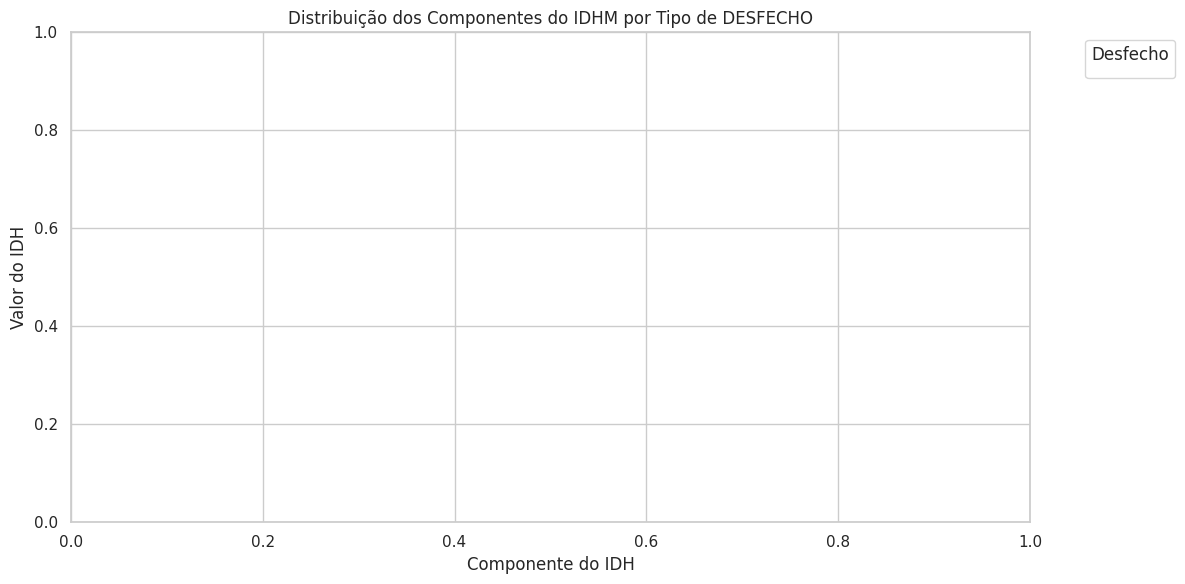

In [ ]:
# Mapeia valores numéricos para strings para combinar com a paleta
df_melt['DESFECHO'] = df_melt['DESFECHO'].map({0: 'Desfavorável', 1: 'Favorável'})

# Remove registros onde o mapeamento não foi possível (se houver)
df_melt = df_melt.dropna(subset=['DESFECHO'])

# Define a paleta personalizada
palette_custom = {
    'Favorável': 'green',
    'Desfavorável': 'red'
}

# Plota o gráfico
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_melt, x='Tipo_IDH', y='Valor_IDH', hue='DESFECHO',
               inner='box', palette=palette_custom, cut=0)

plt.title('Distribuição dos Componentes do IDHM por Tipo de DESFECHO')
plt.ylabel('Valor do IDH')
plt.xlabel('Componente do IDH')
plt.legend(title='Desfecho', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Observações do gráfico:
Distribuição dos IDHs:

Para todos os componentes do IDH, os valores para o grupo Favorável tendem a ser um pouco mais altos do que para o grupo Desfavorável.

Isso indica que municípios com melhores indicadores de desenvolvimento humano (especialmente educação, longevidade e renda) tendem a apresentar desfechos mais favoráveis.

Há uma sobreposição significativa nas distribuições, especialmente para idhm e idhm_e. Isso mostra que, embora haja diferença média, há variação interna e os grupos não são totalmente separáveis só com esses dados.

Parece que idhm_l (longevidade) e idhm_r (renda) mostram uma separação mais clara entre desfechos favoráveis e desfavoráveis, com distribuições deslocadas.

In [ ]:

colunas_vazias = [
    'ANO',
    'SITUA_ENCE'
    ]

base2.drop(columns=colunas_vazias, inplace = True)
print(f'{base2.shape}')



(166487, 31)


# Transformação dos dados - texto > categoria

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = base2

# Criar um LabelEncoder para cada coluna categórica
label_encoders = {}
mappings = {}  # Dicionário para armazenar a mapeação de cada coluna

for col in df.select_dtypes(include=['object']).columns:  # Seleciona colunas categóricas
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Aplica o encoder
    label_encoders[col] = le  # Salva o encoder caso precise reverter depois
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Armazena a mapeação original -> código

# Exibir resumo das transformações corretamente
print("\nResumo das transformações categóricas:\n")
for col, mapping in mappings.items():
    print(f"Coluna: {col}")
    for original, encoded in mapping.items():  # Agora usamos o mapeamento correto
        print(f"  {encoded} -> {original}")
    print("-" * 40)  # Separador visual para cada coluna



Resumo das transformações categóricas:

Coluna: ID_MUNICIP
  0 -> 110001
  1 -> 110002
  2 -> 110004
  3 -> 110005
  4 -> 110006
  5 -> 110007
  6 -> 110008
  7 -> 110009
  8 -> 110010
  9 -> 110011
  10 -> 110012
  11 -> 110013
  12 -> 110014
  13 -> 110015
  14 -> 110018
  15 -> 110020
  16 -> 110028
  17 -> 110029
  18 -> 110030
  19 -> 110032
  20 -> 110033
  21 -> 110034
  22 -> 110037
  23 -> 110040
  24 -> 110045
  25 -> 110050
  26 -> 110070
  27 -> 110080
  28 -> 110090
  29 -> 110092
  30 -> 110094
  31 -> 110110
  32 -> 110120
  33 -> 110130
  34 -> 110140
  35 -> 110145
  36 -> 110146
  37 -> 110149
  38 -> 110150
  39 -> 110155
  40 -> 110160
  41 -> 110170
  42 -> 110175
  43 -> 110180
  44 -> 120001
  45 -> 120005
  46 -> 120010
  47 -> 120013
  48 -> 120017
  49 -> 120020
  50 -> 120025
  51 -> 120030
  52 -> 120032
  53 -> 120033
  54 -> 120034
  55 -> 120035
  56 -> 120038
  57 -> 120039
  58 -> 120040
  59 -> 120042
  60 -> 120043
  61 -> 120045
  62 -> 120050
  63 

In [ ]:
import pickle

# Salvar o mapeamento em um arquivo pickle
with open(OutPath+'mappings_labels5anosIDH.pkl', 'wb') as f:
    pickle.dump(mappings, f)


**LEMBRAR DE NORMALIZAR DIAS_EM_TRATAMENTO e salvar a NORMALIZACAO (INDICES DE NORMALIZACAO)**

In [ ]:
from datetime import datetime

now = datetime.now()  # current date and time
date_time = now.strftime("%m-%d-%Y_%H-%M-%S")

print("date and time:", date_time)
df.to_csv(OutPath + 'Sinantb_desfechos5anosIDH_' + date_time + '.csv', encoding='utf-8', index=False)


date and time: 05-20-2025_00-15-45


In [ ]:
!pip install lifelines

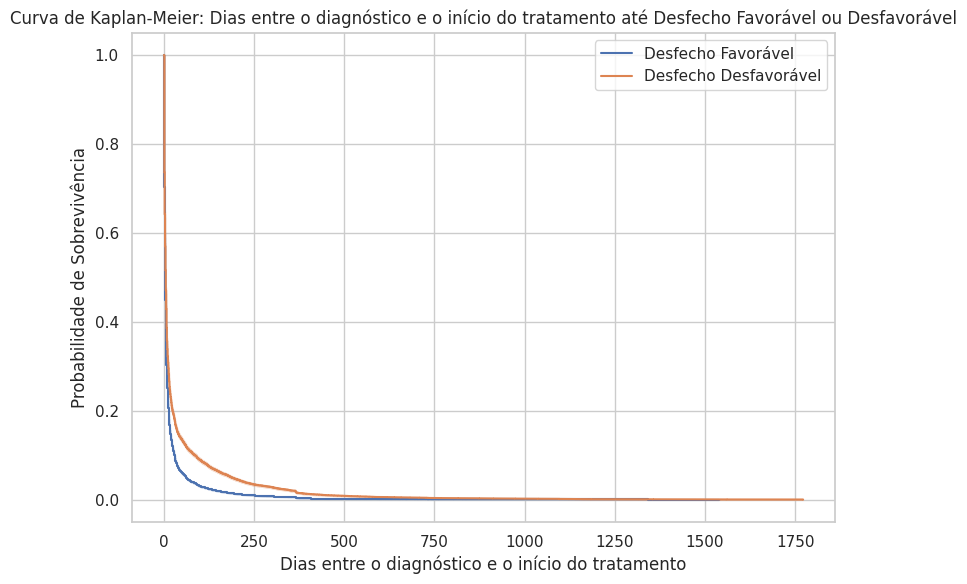

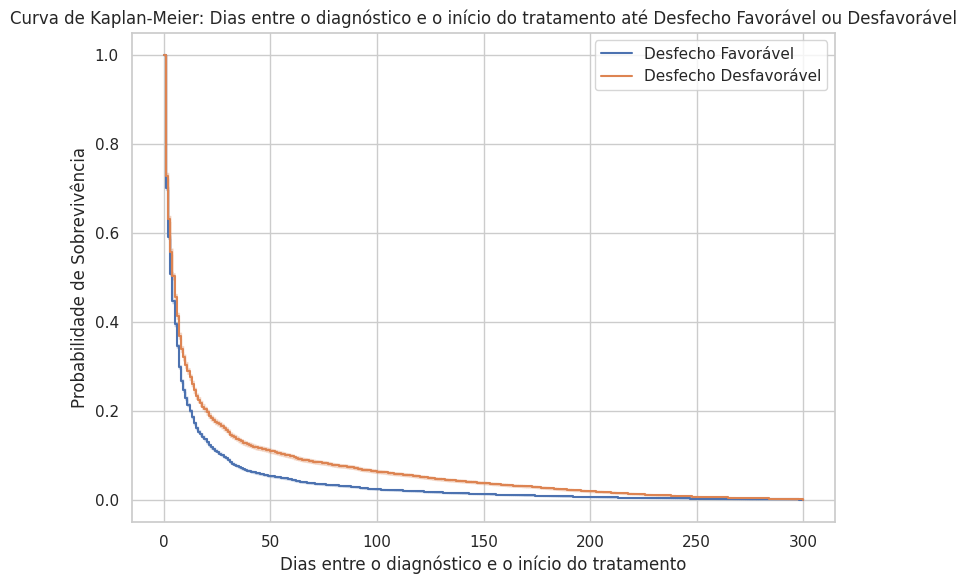

Curvas de Kaplan-Meier geradas e exibidas na tela.


In [ ]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Filtrar os dados para o desfecho favorável (1) e desfavorável (0), removendo registros com DIAS = 0
df_favoravel = df[(df["DESFECHO"] == 1) & (df["DIAS_ATE_INICIO_TRATAMENTO"] > 0)]
df_desfavoravel = df[(df["DESFECHO"] == 0) & (df["DIAS_ATE_INICIO_TRATAMENTO"] > 0)]

# Criando o Kaplan-Meier Fitter
kmf_favoravel = KaplanMeierFitter()
kmf_desfavoravel = KaplanMeierFitter()

# Ajustando o Kaplan-Meier para os pacientes com desfecho favorável (1)
plt.figure(figsize=(8, 6))
kmf_favoravel.fit(df_favoravel["DIAS_ATE_INICIO_TRATAMENTO"], label="Desfecho Favorável")
kmf_favoravel.plot()

# Ajustando o Kaplan-Meier para os pacientes com desfecho desfavorável (0)
kmf_desfavoravel.fit(df_desfavoravel["DIAS_ATE_INICIO_TRATAMENTO"], label="Desfecho Desfavorável")
kmf_desfavoravel.plot()

plt.title("Curva de Kaplan-Meier: Dias entre o diagnóstico e o início do tratamento até Desfecho Favorável ou Desfavorável")
plt.xlabel("Dias entre o diagnóstico e o início do tratamento")
plt.ylabel("Probabilidade de Sobrevivência")
plt.legend()
plt.tight_layout()
plt.show()  # Exibe o gráfico na tela

# Agora vamos fazer o "zoom" para os primeiros 400 dias
plt.figure(figsize=(8, 6))

# Plotando apenas os dados com até 400 dias de tratamento
kmf_favoravel.fit(df_favoravel[df_favoravel["DIAS_ATE_INICIO_TRATAMENTO"] <= 300]["DIAS_ATE_INICIO_TRATAMENTO"], label="Desfecho Favorável")
kmf_favoravel.plot()

kmf_desfavoravel.fit(df_desfavoravel[df_desfavoravel["DIAS_ATE_INICIO_TRATAMENTO"] <= 300]["DIAS_ATE_INICIO_TRATAMENTO"], label="Desfecho Desfavorável")
kmf_desfavoravel.plot()

plt.title("Curva de Kaplan-Meier: Dias entre o diagnóstico e o início do tratamento até Desfecho Favorável ou Desfavorável")
plt.xlabel("Dias entre o diagnóstico e o início do tratamento")
plt.ylabel("Probabilidade de Sobrevivência")
plt.legend()
plt.tight_layout()
plt.show()  # Exibe o gráfico na tela

# Mensagem para indicar que os gráficos foram gerados
print("Curvas de Kaplan-Meier geradas e exibidas na tela.")


🔍 Análise crítica:
Quanto maior o atraso, menor a probabilidade de iniciar o tratamento:

Ambas as curvas caem rapidamente, mostrando que a maior parte dos pacientes começa o tratamento nos primeiros dias após o diagnóstico.

Isso é esperado, já que o sistema de saúde tende a iniciar o tratamento o quanto antes.

Desfecho desfavorável tem “sobrevivência” maior ao atraso:

A curva laranja está consistentemente acima da azul.

Interpretação: Pacientes que tiveram desfechos desfavoráveis tendem a demorar mais para iniciar o tratamento.

Isso pode indicar falhas no acesso ao tratamento ou fatores sociais que dificultam a adesão precoce ao cuidado.

Diferença inicial muito acentuada:

Nos primeiros 30 dias, há uma grande queda nas duas curvas, mas a azul (favorável) cai mais rapidamente.

Isso sugere que iniciar o tratamento rapidamente está associado a maior chance de cura.

Conclusão:
A curva de Kaplan-Meier evidencia que pacientes que iniciam o tratamento mais rapidamente tendem a ter desfechos mais favoráveis, reforçando a importância de reduzir o tempo entre diagnóstico e início do tratamento para melhorar os resultados.